<a href="https://colab.research.google.com/github/PriyanshuR23/Industrial_IOT_Predictive_Maintenance/blob/main/Visualization1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
# Load dataset
file_path = '/content/sensor.csv'  # Update this path in Colab
sensor_data = pd.read_csv(file_path)


In [4]:

# Convert Timestamp Column
sensor_data['timestamp'] = pd.to_datetime(sensor_data.iloc[:, 53], format='%d-%m-%y %H:%M')


In [5]:
# Data Overview
print("Dataset Summary:")
print(sensor_data.info())
print("\nMissing Values:")
print(sensor_data.isnull().sum())


Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118367 entries, 0 to 118366
Data columns (total 54 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   ID              118367 non-null  int64         
 1   sensor_00       114245 non-null  float64       
 2   sensor_01       118303 non-null  float64       
 3   sensor_02       118358 non-null  float64       
 4   sensor_03       118358 non-null  float64       
 5   sensor_04       118358 non-null  float64       
 6   sensor_05       118358 non-null  float64       
 7   sensor_06       118121 non-null  float64       
 8   sensor_07       117594 non-null  float64       
 9   sensor_08       117657 non-null  float64       
 10  sensor_09       118358 non-null  float64       
 11  sensor_10       118358 non-null  float64       
 12  sensor_11       118358 non-null  float64       
 13  sensor_12       118358 non-null  float64       
 14  sensor_13       118

In [6]:
# Handling Missing Values
sensor_data.iloc[:, 1:52] = sensor_data.iloc[:, 1:52].fillna(sensor_data.iloc[:, 1:52].median())
sensor_data = sensor_data.dropna(subset=['machine_status'])

In [7]:
print(sensor_data.isnull().sum())

ID                0
sensor_00         0
sensor_01         0
sensor_02         0
sensor_03         0
sensor_04         0
sensor_05         0
sensor_06         0
sensor_07         0
sensor_08         0
sensor_09         0
sensor_10         0
sensor_11         0
sensor_12         0
sensor_13         0
sensor_14         0
sensor_15         0
sensor_16         0
sensor_17         0
sensor_18         0
sensor_19         0
sensor_20         0
sensor_21         0
sensor_22         0
sensor_23         0
sensor_24         0
sensor_25         0
sensor_26         0
sensor_27         0
sensor_28         0
sensor_29         0
sensor_30         0
sensor_31         0
sensor_32         0
sensor_33         0
sensor_34         0
sensor_35         0
sensor_36         0
sensor_37         0
sensor_38         0
sensor_39         0
sensor_40         0
sensor_41         0
sensor_42         0
sensor_43         0
sensor_44         0
sensor_45         0
sensor_46         0
sensor_47         0
sensor_48         0


In [8]:
# Variance Analysis for Feature Selection
variances = sensor_data.iloc[:, 1:52].var().sort_values(ascending=False)
selected_sensors = variances[variances > 0.01].index.tolist()
selected_sensors.append('machine_status')

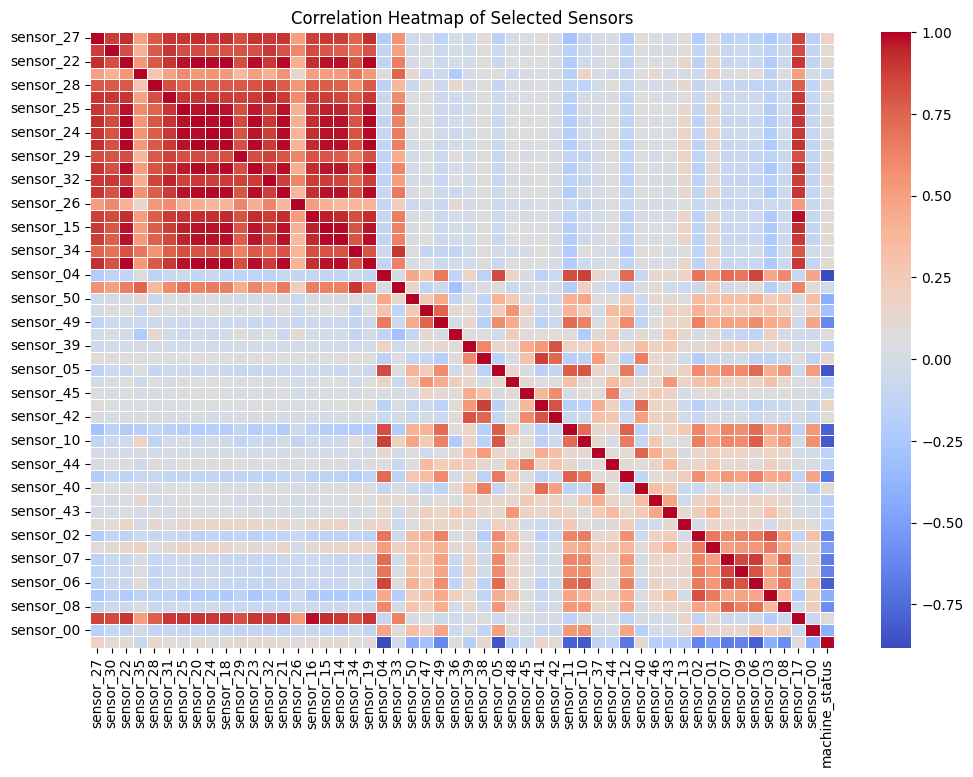

In [9]:
# Correlation Analysis
# Include all relevant columns for correlation analysis
correlation_matrix = sensor_data[selected_sensors].corr()  # Selecting all necessary columns including 'machine_status'
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Selected Sensors')
plt.show()


In [10]:
# PCA for Dimensionality Reduction
scaler = StandardScaler()
sensor_scaled = scaler.fit_transform(sensor_data[selected_sensors])
pca = PCA(n_components=5)
pca_result = pca.fit_transform(sensor_scaled)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [0.3516917  0.19248109 0.08995227 0.05068147 0.03419043]


In [11]:
# Descriptive Statistics
print("\nDescriptive Statistics of Selected Sensors:")
print(sensor_data[selected_sensors].describe())


Descriptive Statistics of Selected Sensors:
           sensor_27      sensor_30      sensor_22      sensor_35  \
count  118366.000000  118366.000000  118366.000000  118366.000000   
mean      847.277070     810.066986     810.623842     447.729481   
std       370.859421     342.135171     327.605755     302.763414   
min        13.945460      23.958330       0.000000       2.260970   
25%       786.574100     785.937500     939.812225     198.485400   
50%       997.094400     893.749900     957.991550     309.418000   
75%      1105.217750     968.229100     980.153700     821.919750   
max      1768.717000    1800.000000    1129.466000     972.238700   

           sensor_28      sensor_31      sensor_25      sensor_20  \
count  118366.000000  118366.000000  118366.000000  118366.000000   
mean      620.484890     731.562387     706.902740     742.163436   
std       289.208604     288.120464     282.412142     277.585895   
min         0.848722       0.240716      43.154790      9

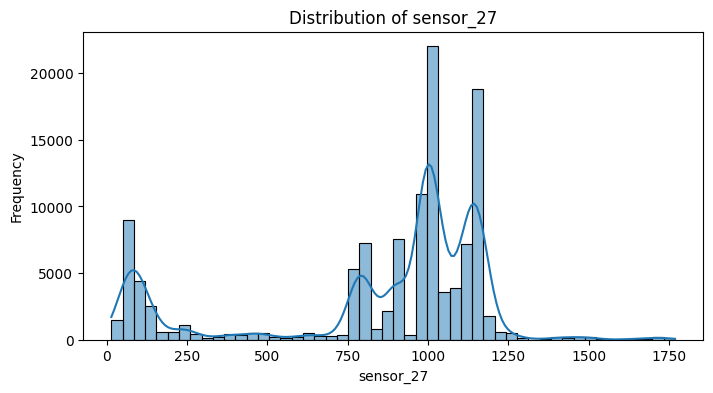

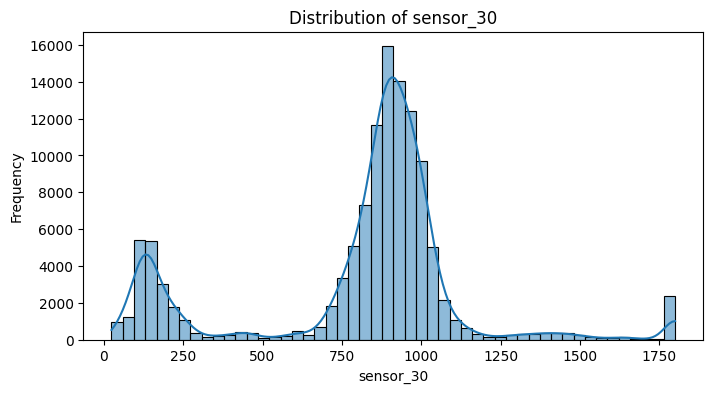

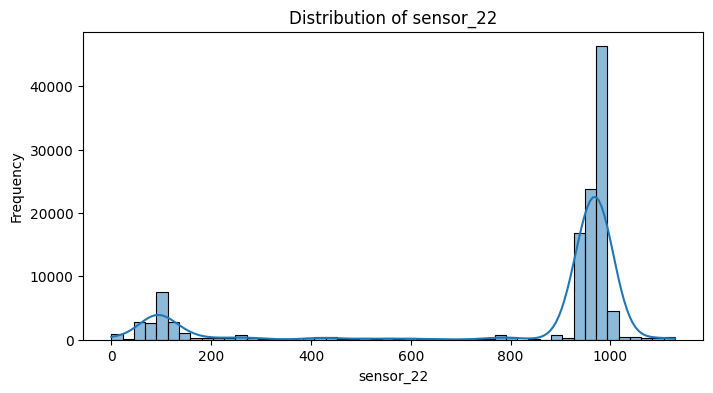

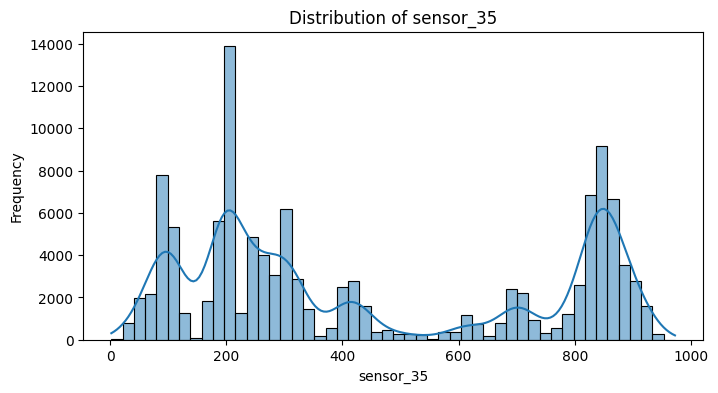

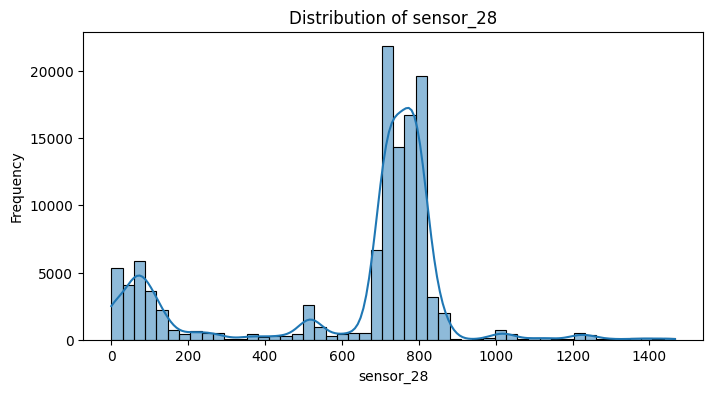

In [12]:
# Visualizations
for sensor in selected_sensors[:5]:  # Limit to 5 sensors for clarity
    plt.figure(figsize=(8,4))
    sns.histplot(sensor_data[sensor], bins=50, kde=True)
    plt.title(f'Distribution of {sensor}')
    plt.xlabel(sensor)
    plt.ylabel('Frequency')
    plt.show()

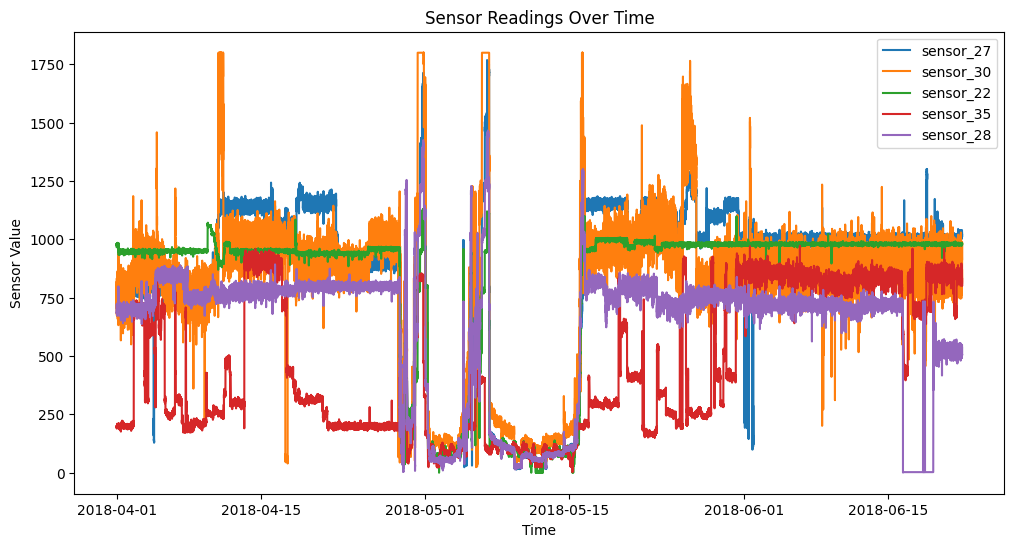

In [13]:
# Time-Series Plot
plt.figure(figsize=(12,6))
for sensor in selected_sensors[:5]:
    plt.plot(sensor_data['timestamp'], sensor_data[sensor], label=sensor)
plt.title('Sensor Readings Over Time')
plt.xlabel('Time')
plt.ylabel('Sensor Value')
plt.legend()
plt.show()

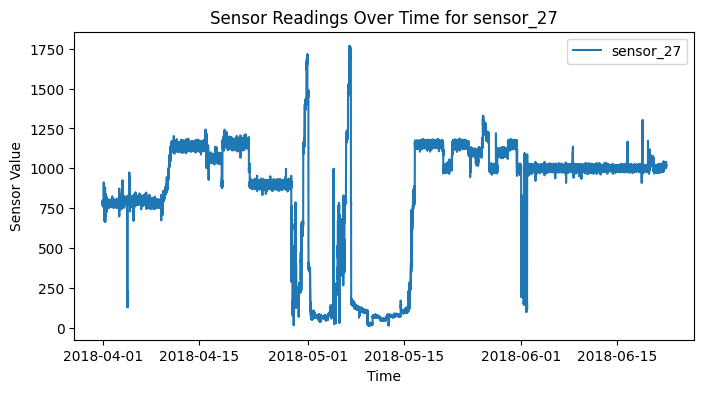

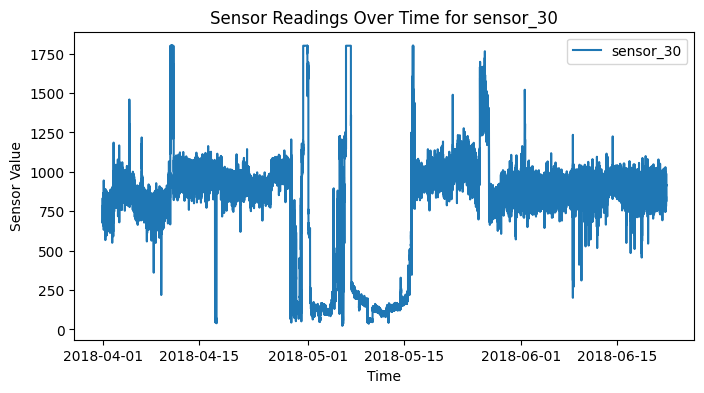

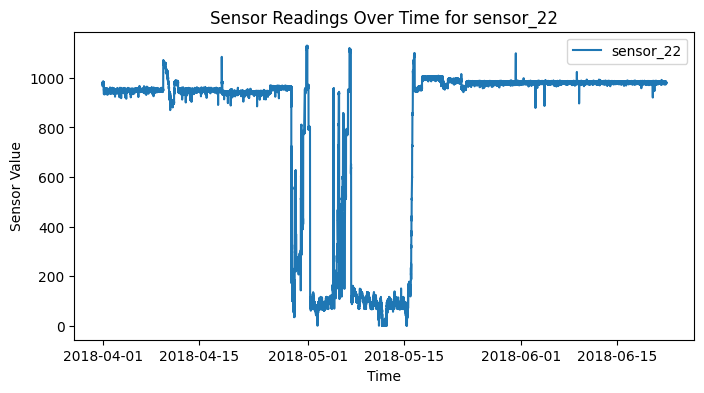

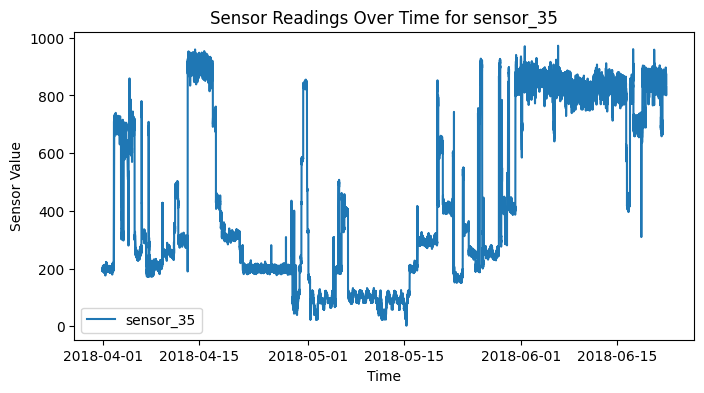

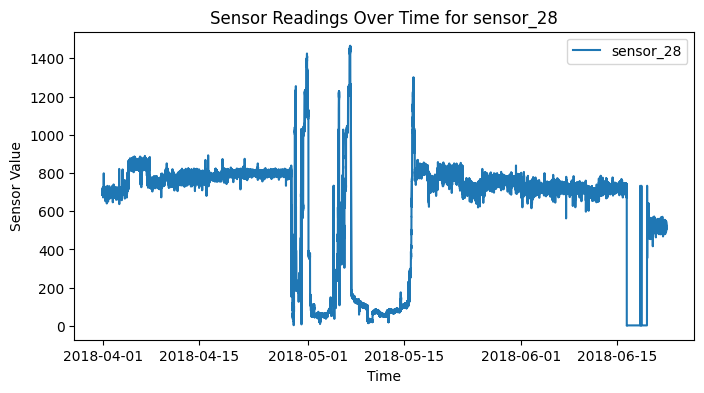

In [14]:
# Time-Series Plots for Individual Sensors
for sensor in selected_sensors[:5]:  # Limit to 5 sensors for clarity
    plt.figure(figsize=(8, 4))  # Create a new figure for each sensor
    plt.plot(sensor_data['timestamp'], sensor_data[sensor], label=sensor)
    plt.title(f'Sensor Readings Over Time for {sensor}')
    plt.xlabel('Time')
    plt.ylabel('Sensor Value')
    plt.legend()
    plt.show()

In [15]:
# Possible Sources of the Problem
problem_sources = """
Possible Sources of the Issue:
1. Incorrect parsing of the timestamp column due to format mismatches.
2. Null or missing values in sensor readings leading to NaNs affecting analysis.
3. Incorrect indexing of sensor columns causing incorrect feature selection.
4. High correlation between sensors reducing model efficiency.
5. Sensor data might have outliers affecting variance calculations.
6. PCA might not be reducing dimensions effectively due to non-standardized data.
"""
print(problem_sources)


Possible Sources of the Issue:
1. Incorrect parsing of the timestamp column due to format mismatches.
2. Null or missing values in sensor readings leading to NaNs affecting analysis.
3. Incorrect indexing of sensor columns causing incorrect feature selection.
4. High correlation between sensors reducing model efficiency.
5. Sensor data might have outliers affecting variance calculations.
6. PCA might not be reducing dimensions effectively due to non-standardized data.



In [16]:
#Feature Engineering
# Find absolute correlations with target variable (e.g., machine_status)
target = 'machine_status'  # Update based on actual failure column
correlations = correlation_matrix[target].abs().sort_values(ascending=False)
# print(correlations)

# Select top features (excluding the target itself)
important_features = correlations[correlations >= 0.5].index.tolist()
print("Selected Features:", important_features)

Selected Features: ['machine_status', 'sensor_04', 'sensor_05', 'sensor_10', 'sensor_06', 'sensor_11', 'sensor_12', 'sensor_07', 'sensor_09', 'sensor_02', 'sensor_49', 'sensor_08', 'sensor_01']


In [17]:
important_features.remove('machine_status')

In [18]:
print("Selected Features:", important_features)
len(important_features)

Selected Features: ['sensor_04', 'sensor_05', 'sensor_10', 'sensor_06', 'sensor_11', 'sensor_12', 'sensor_07', 'sensor_09', 'sensor_02', 'sensor_49', 'sensor_08', 'sensor_01']


12

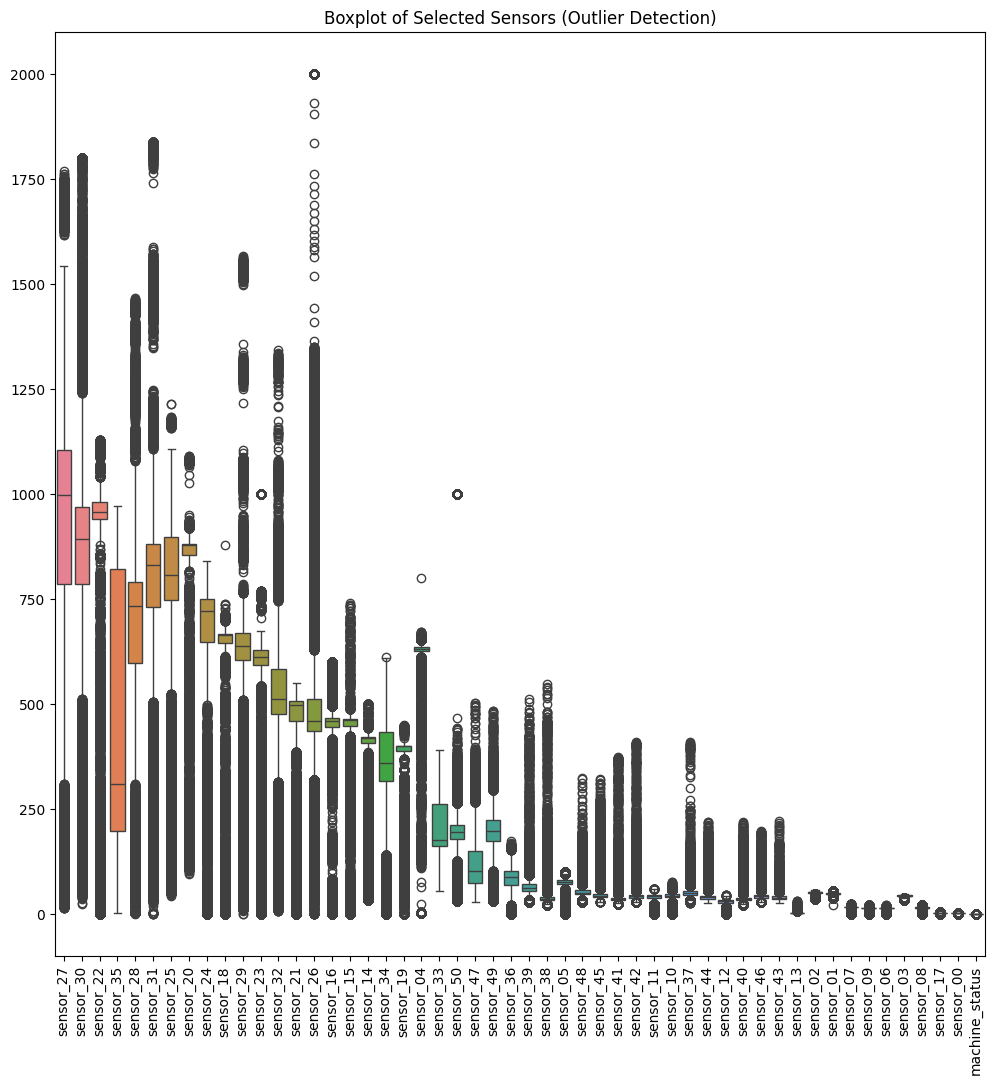

In [19]:
plt.figure(figsize=(12, 12))
sns.boxplot(data=sensor_data[selected_sensors])
plt.xticks(rotation=90)
plt.title("Boxplot of Selected Sensors (Outlier Detection)")
plt.show()

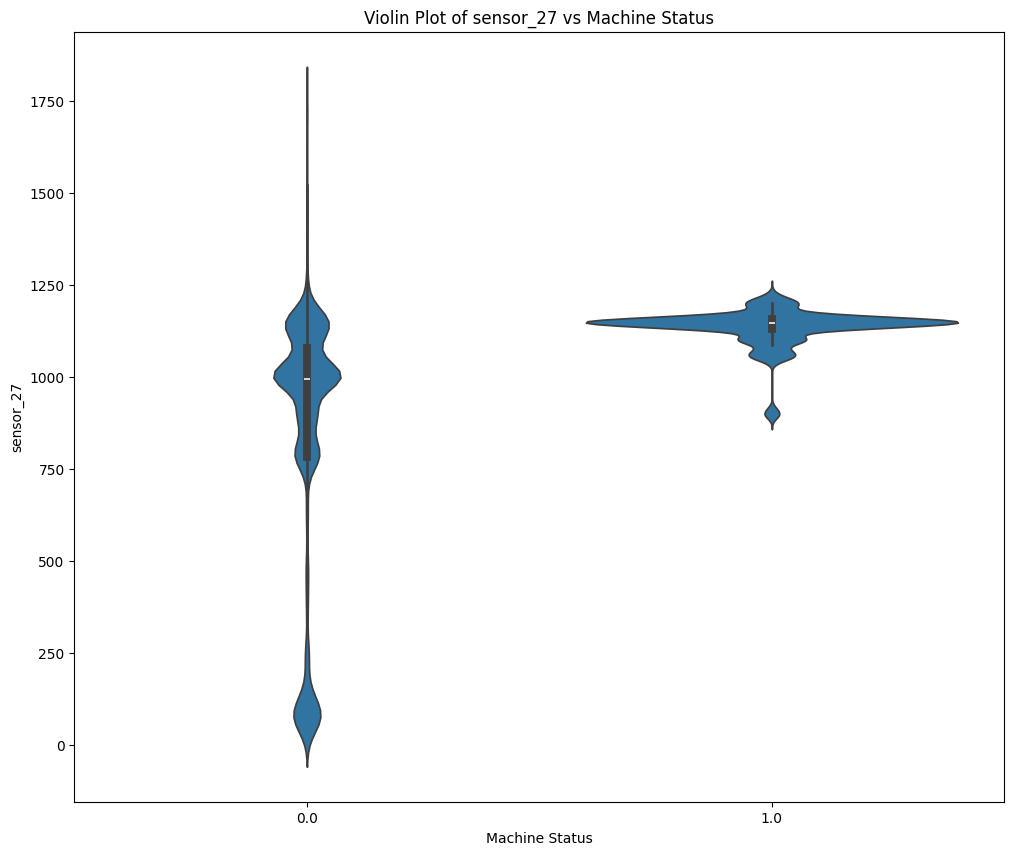

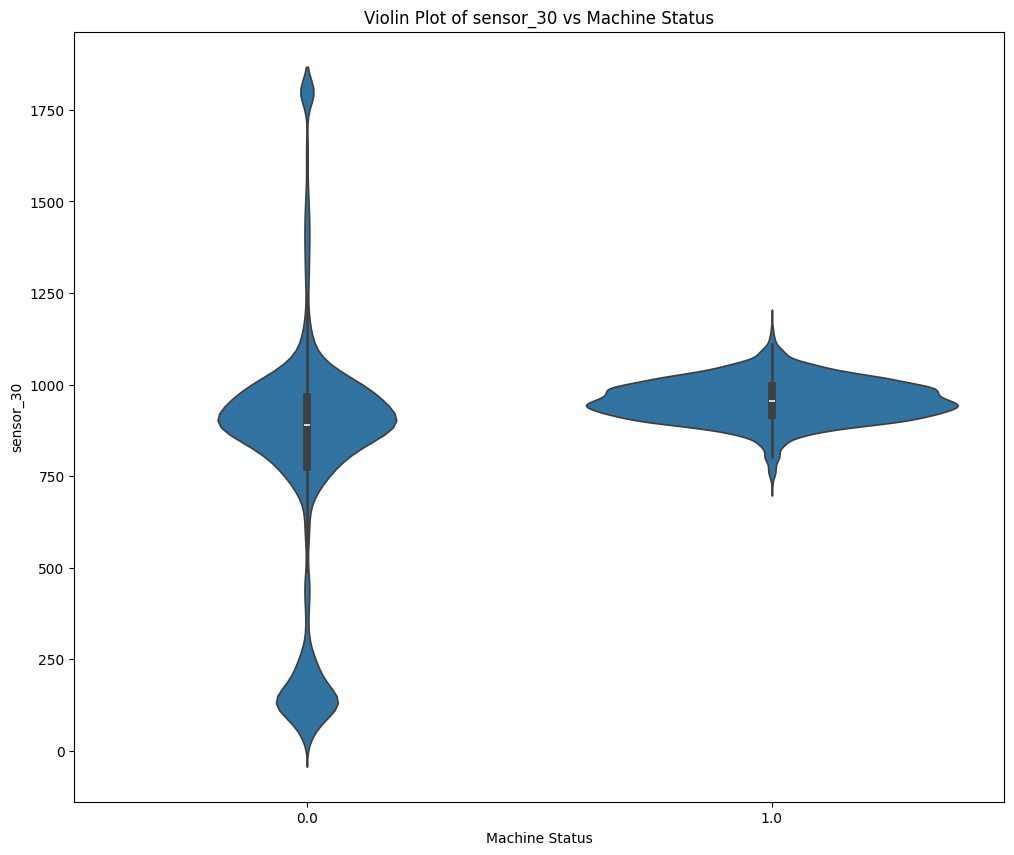

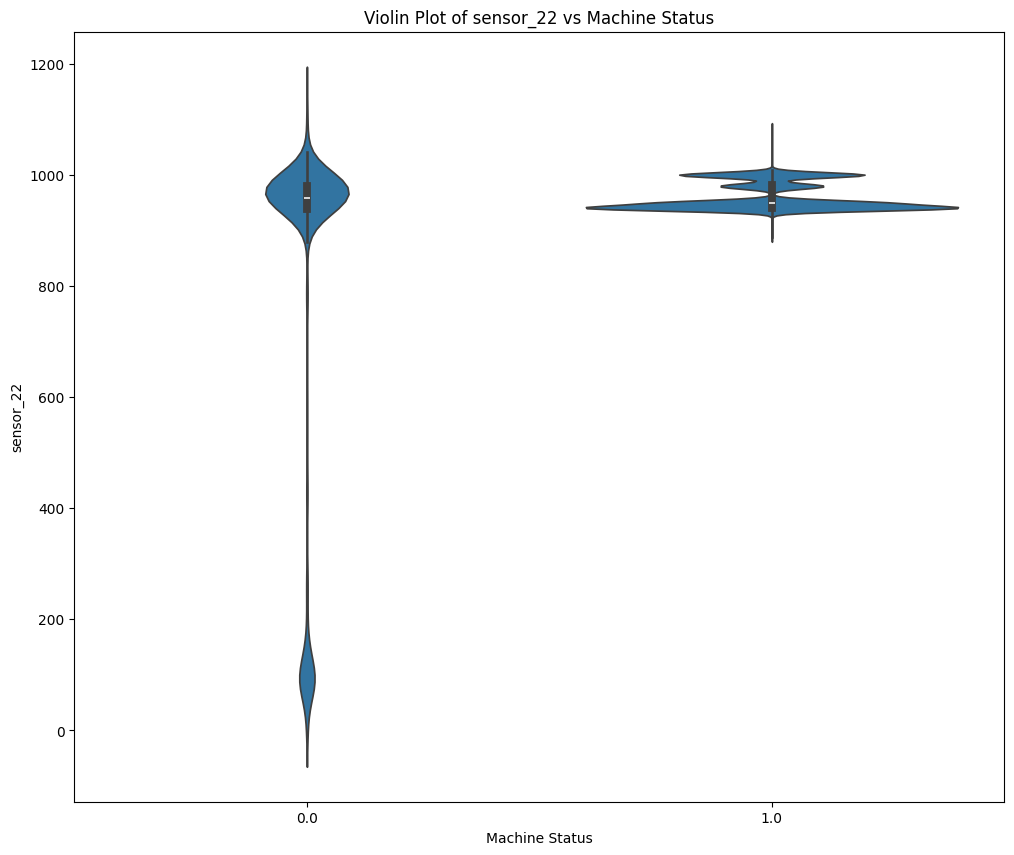

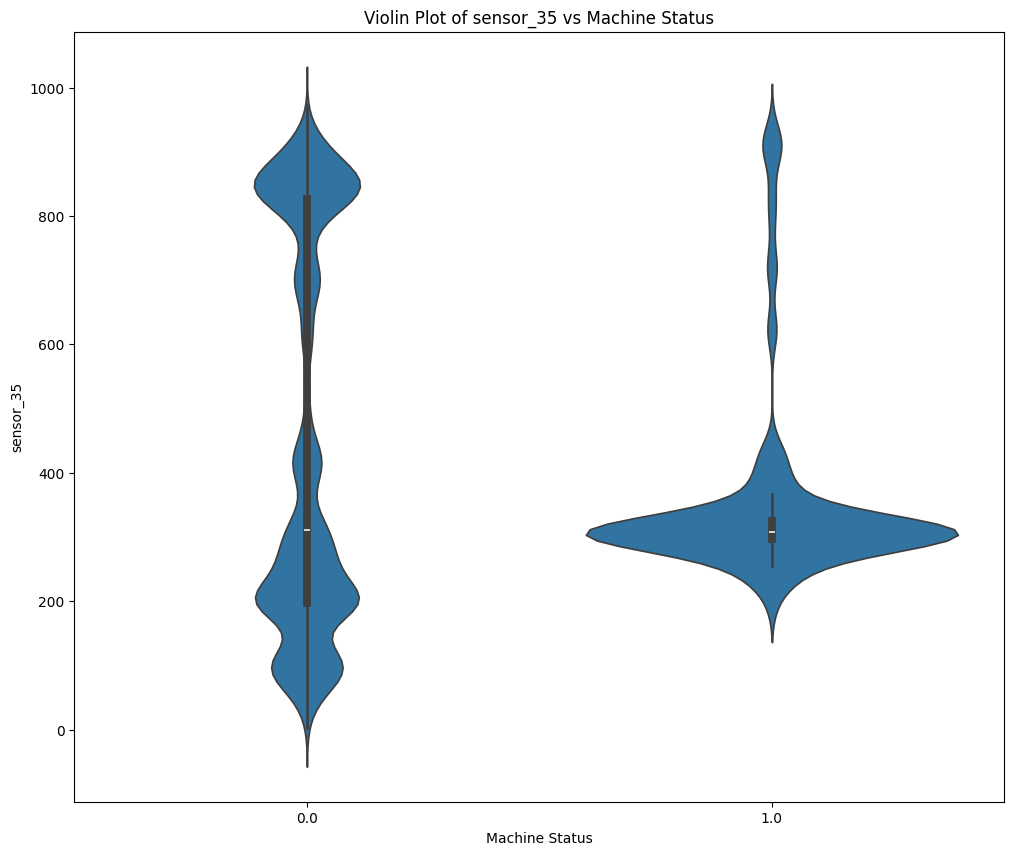

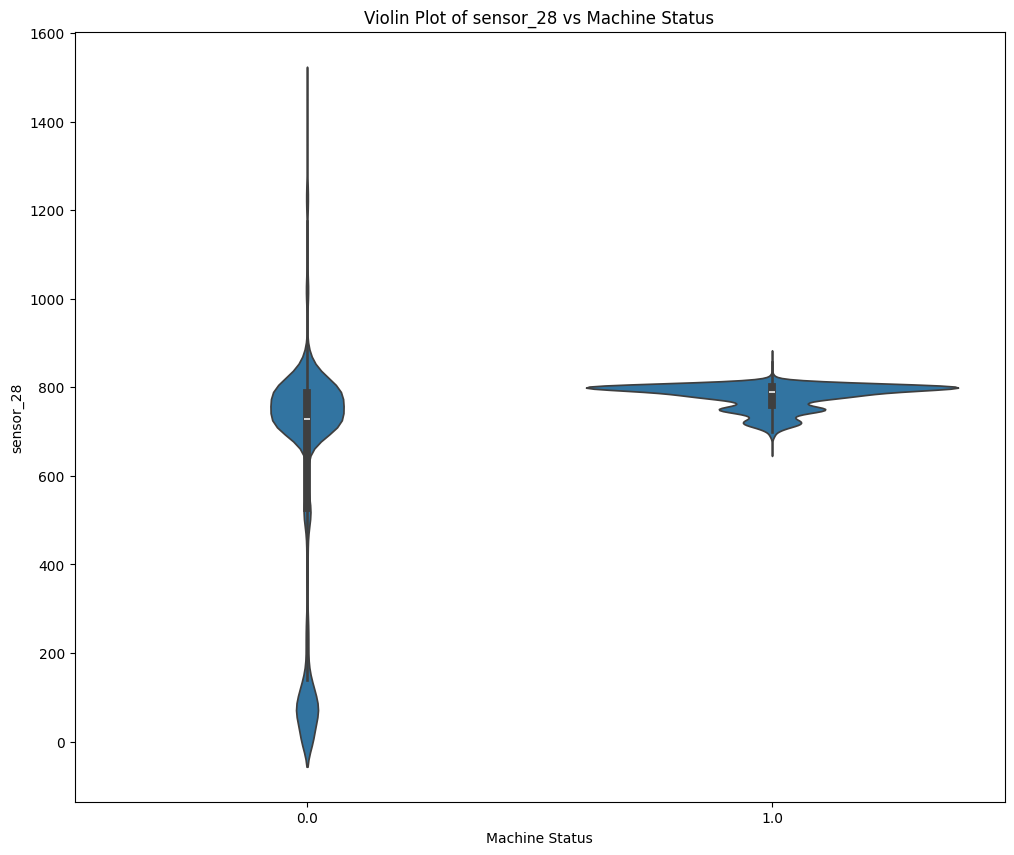

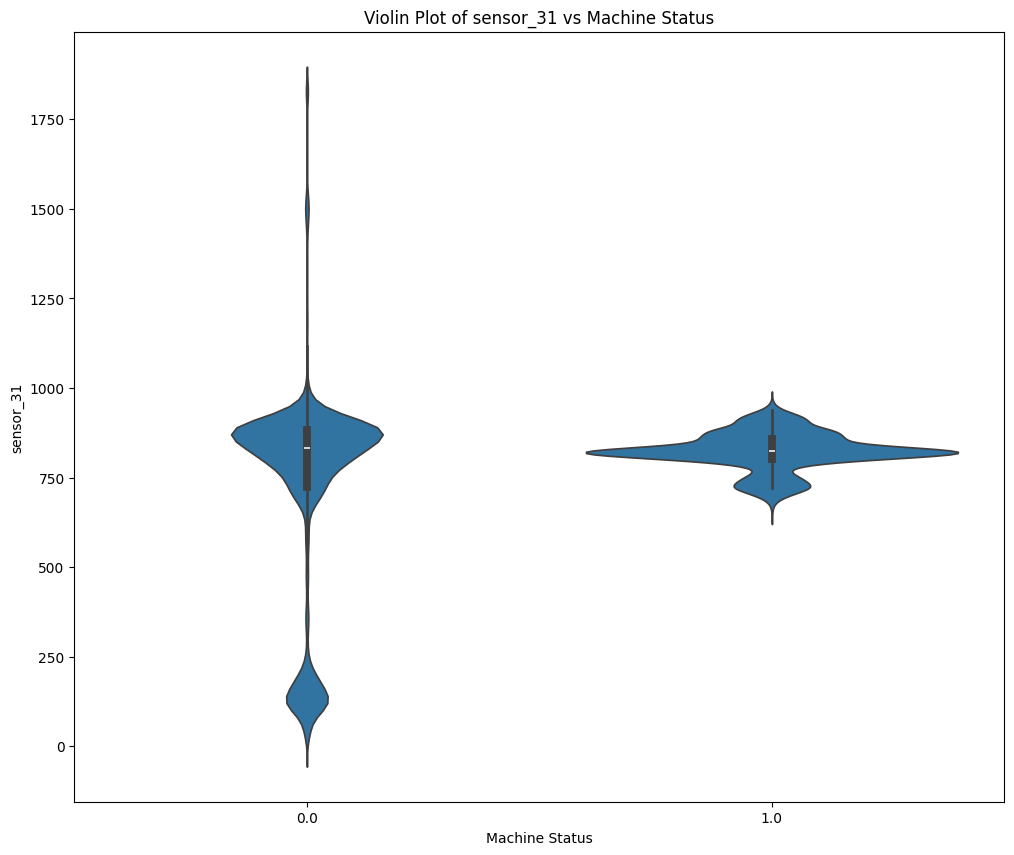

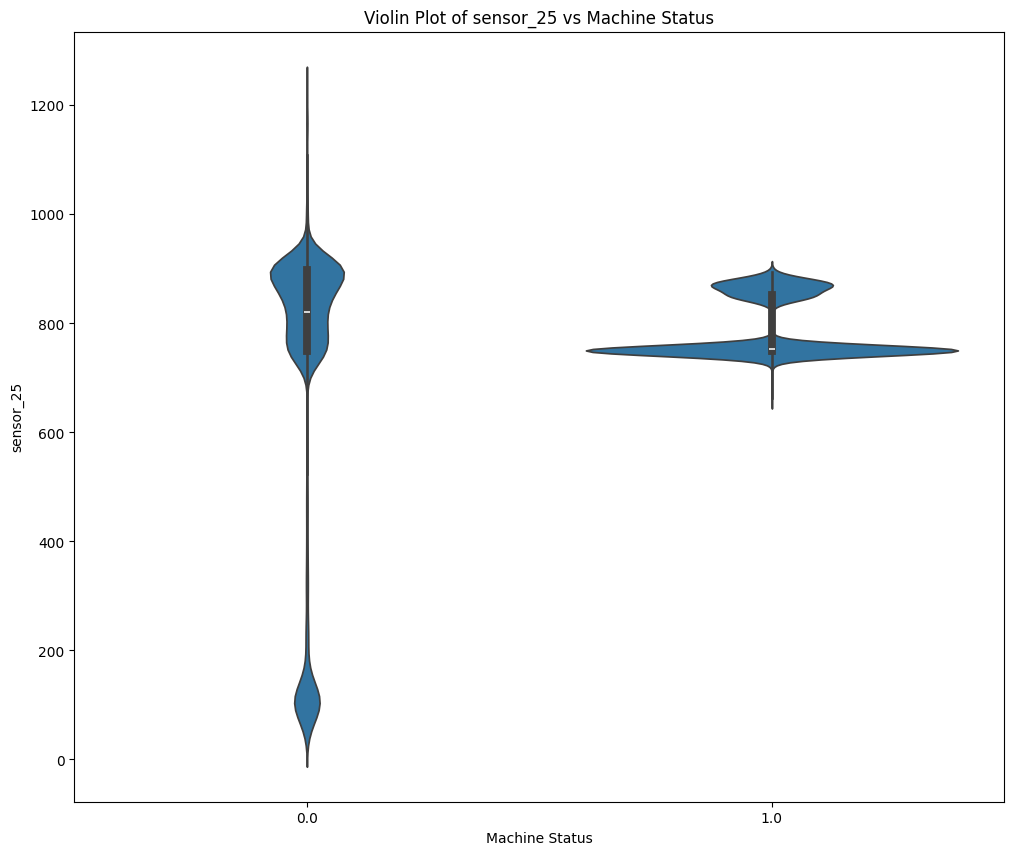

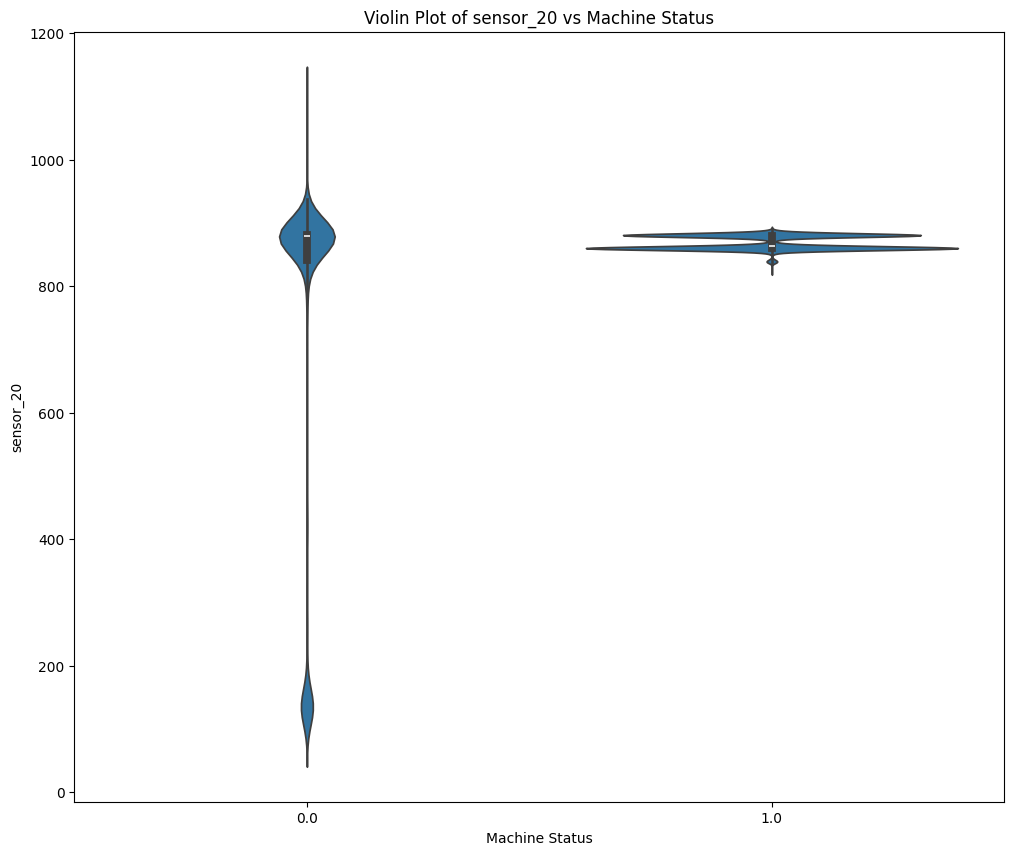

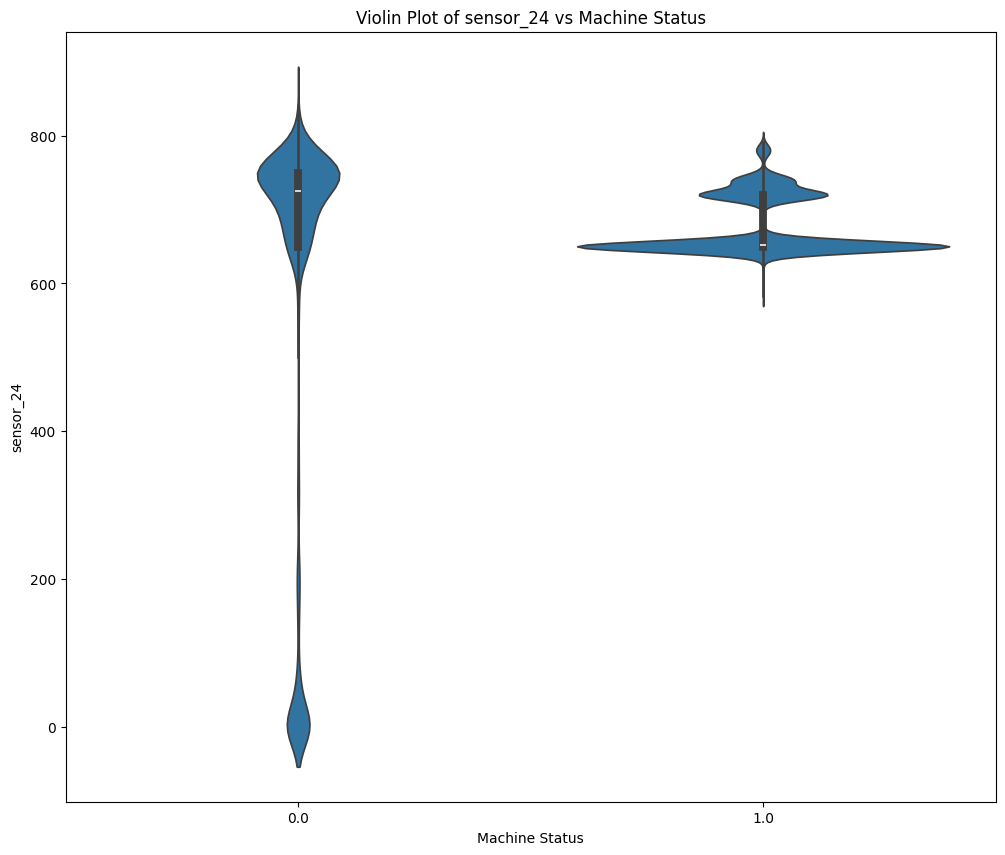

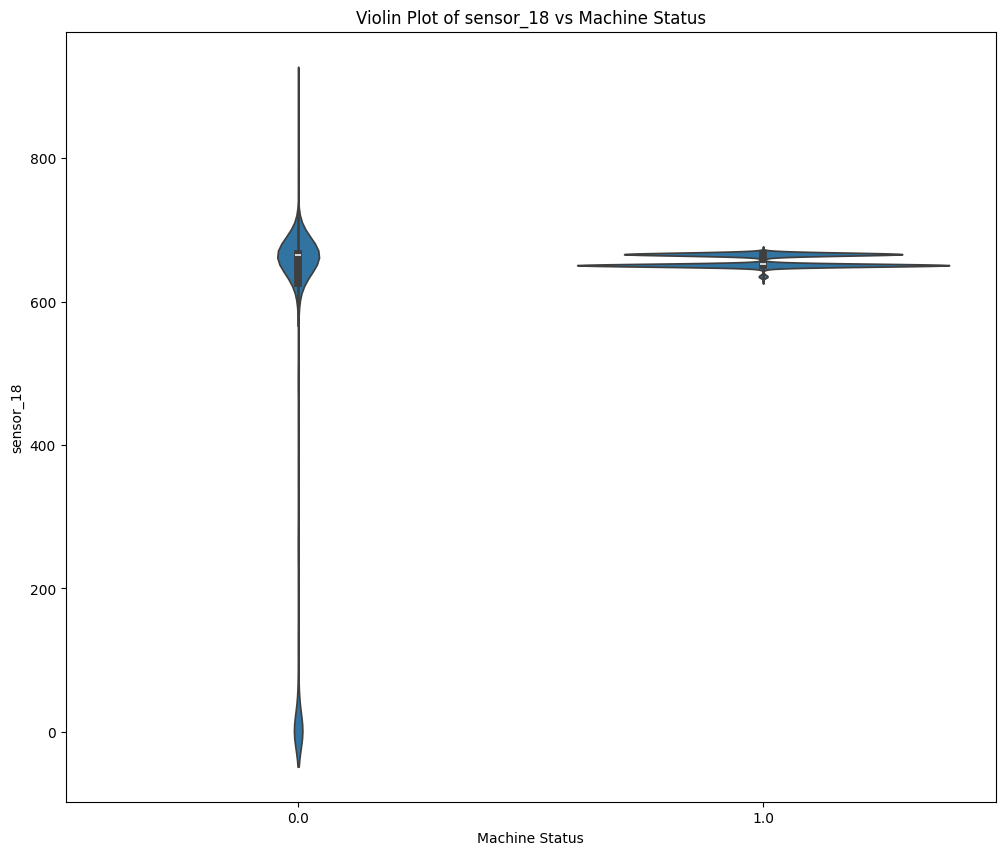

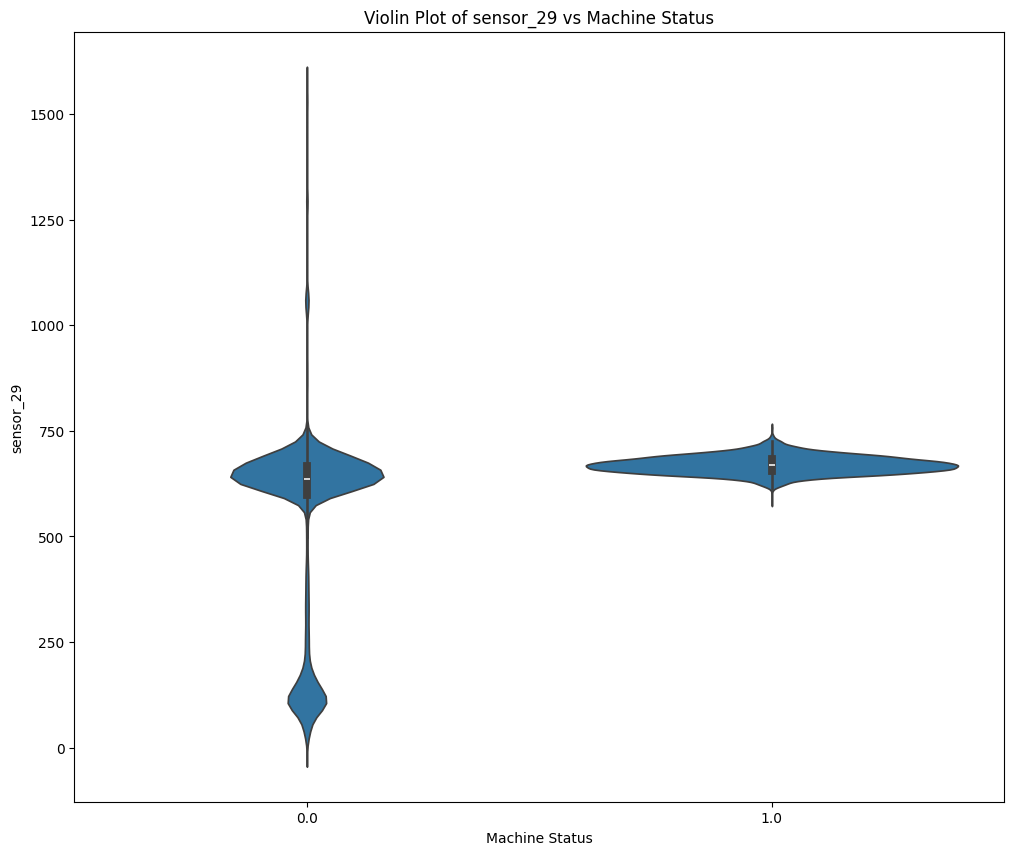

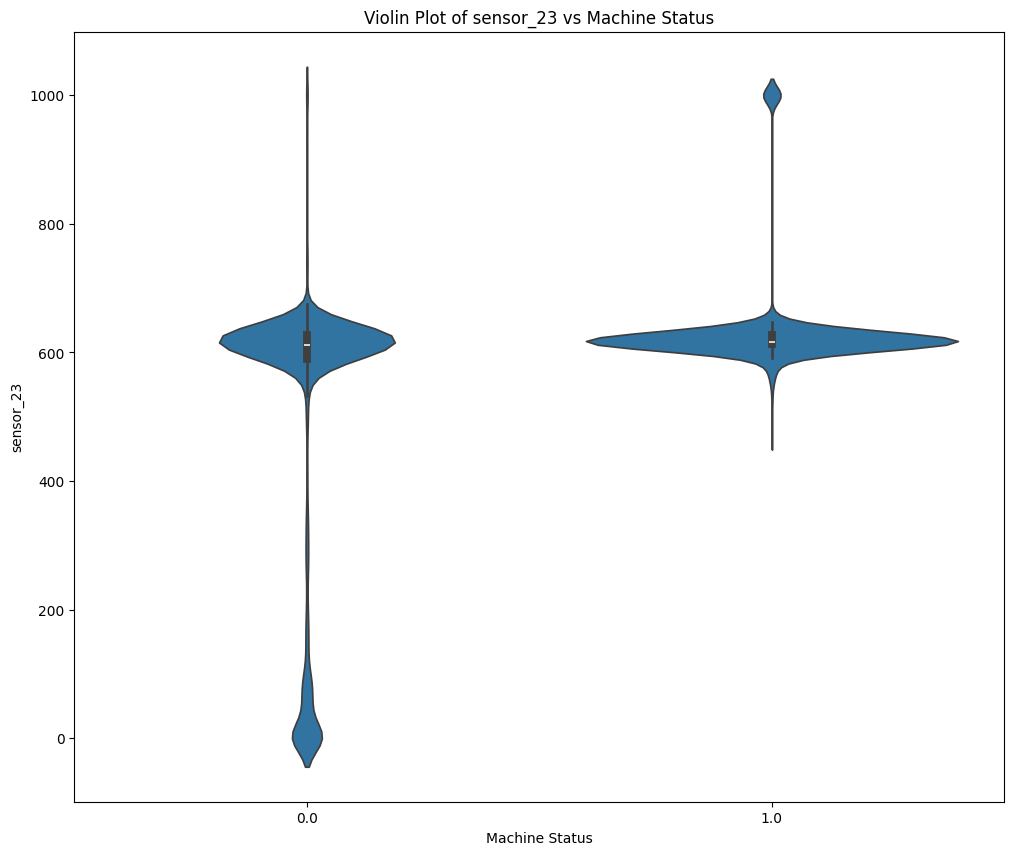

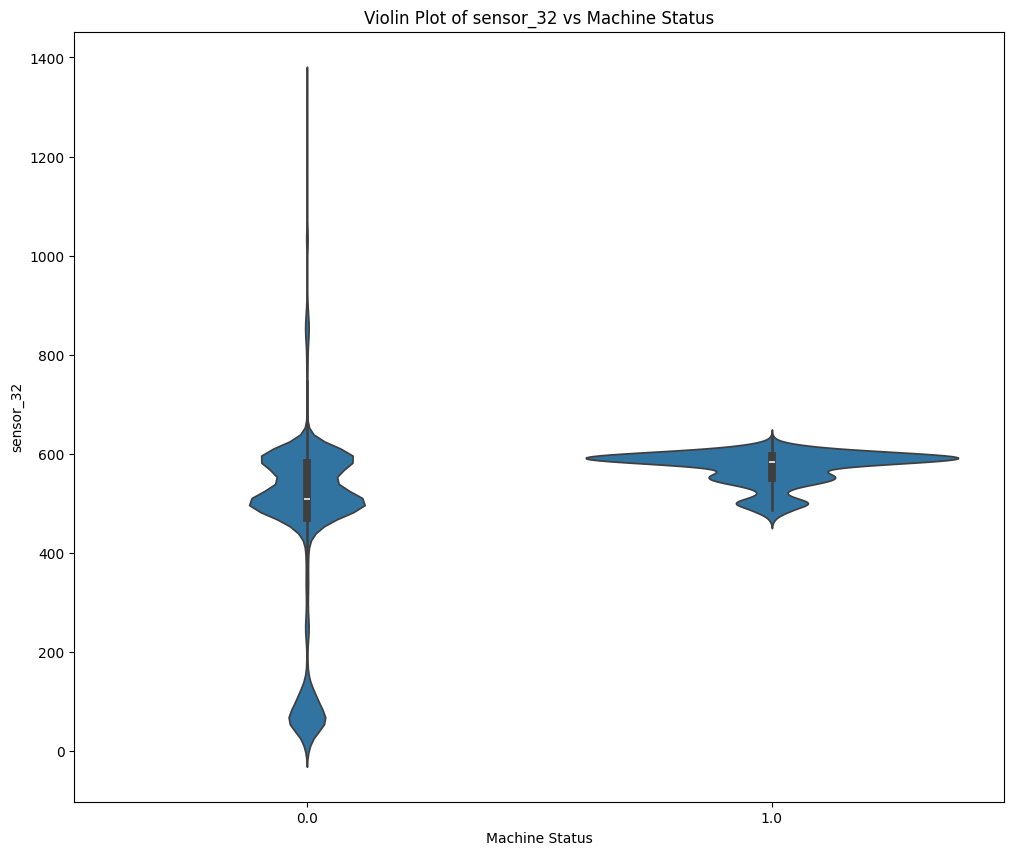

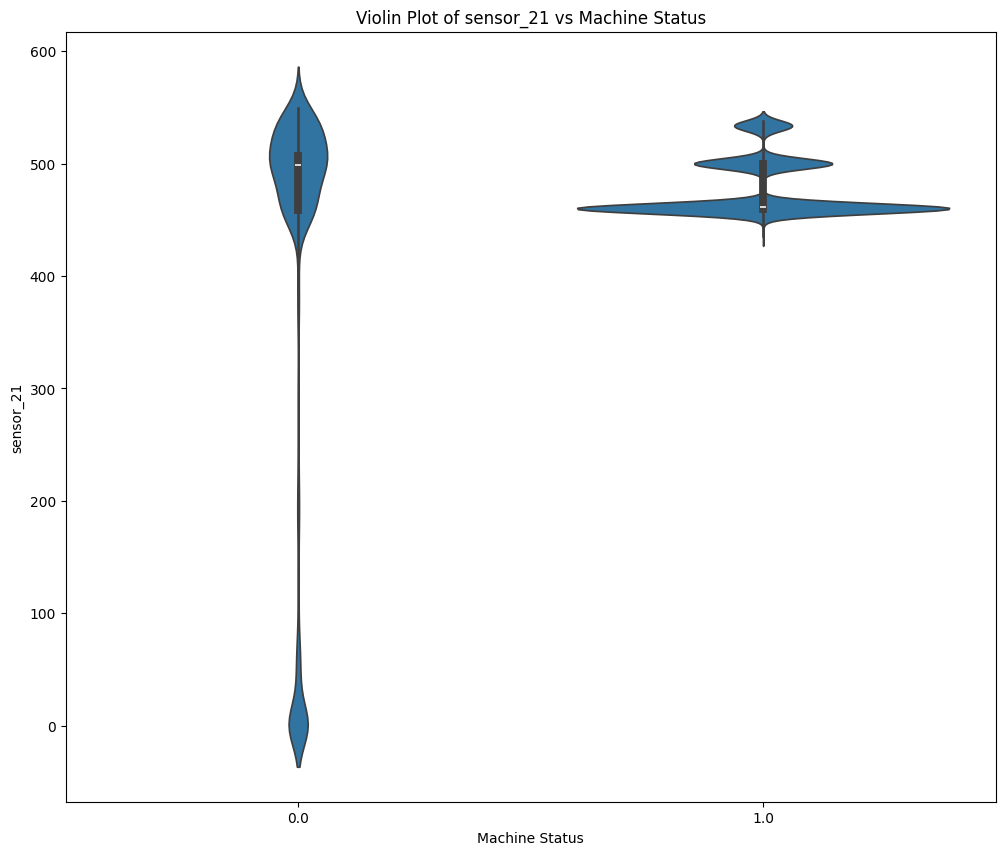

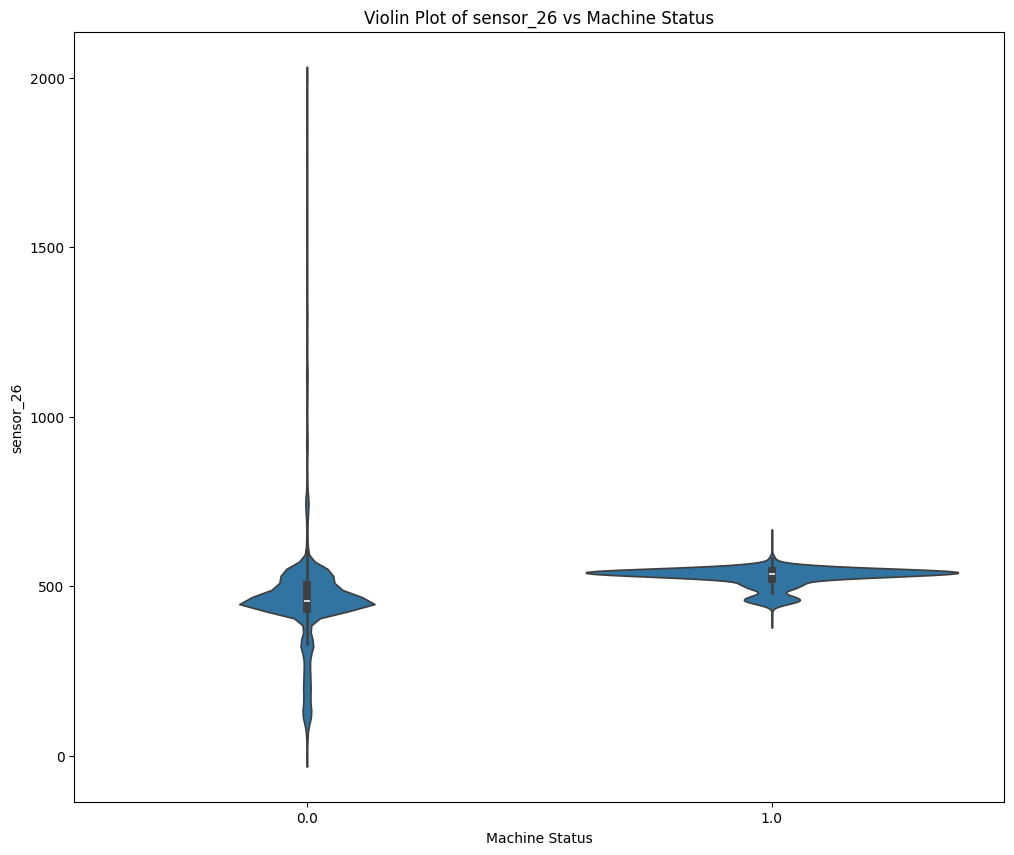

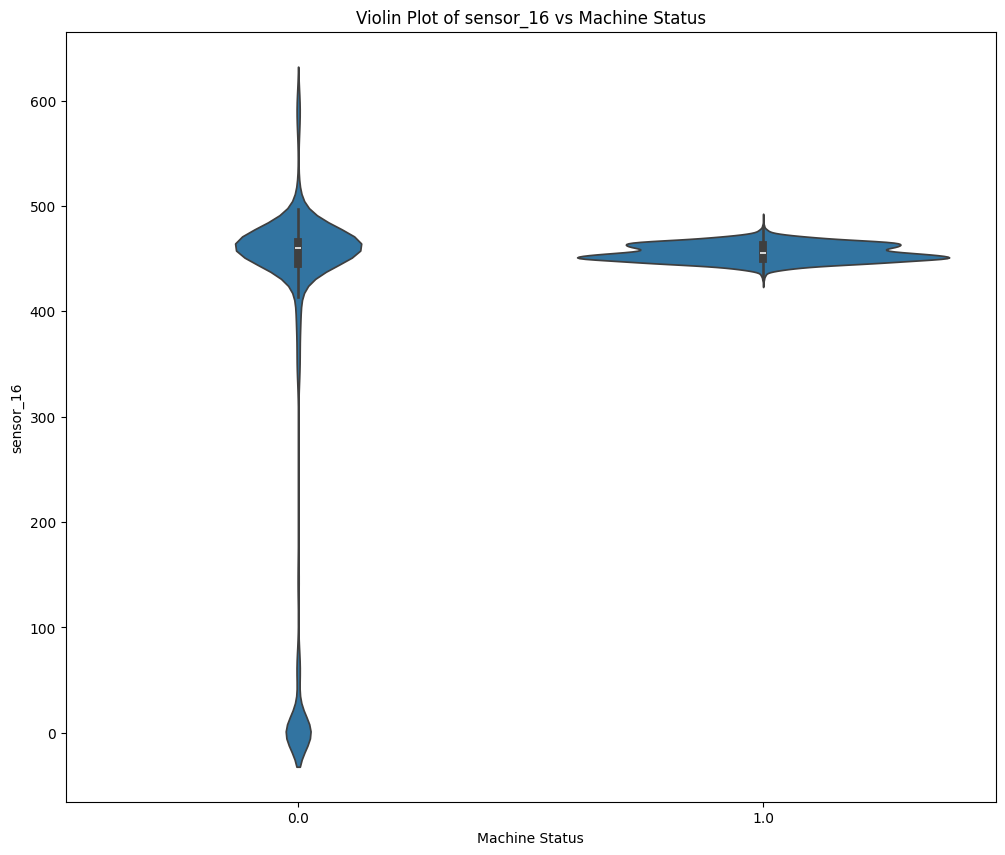

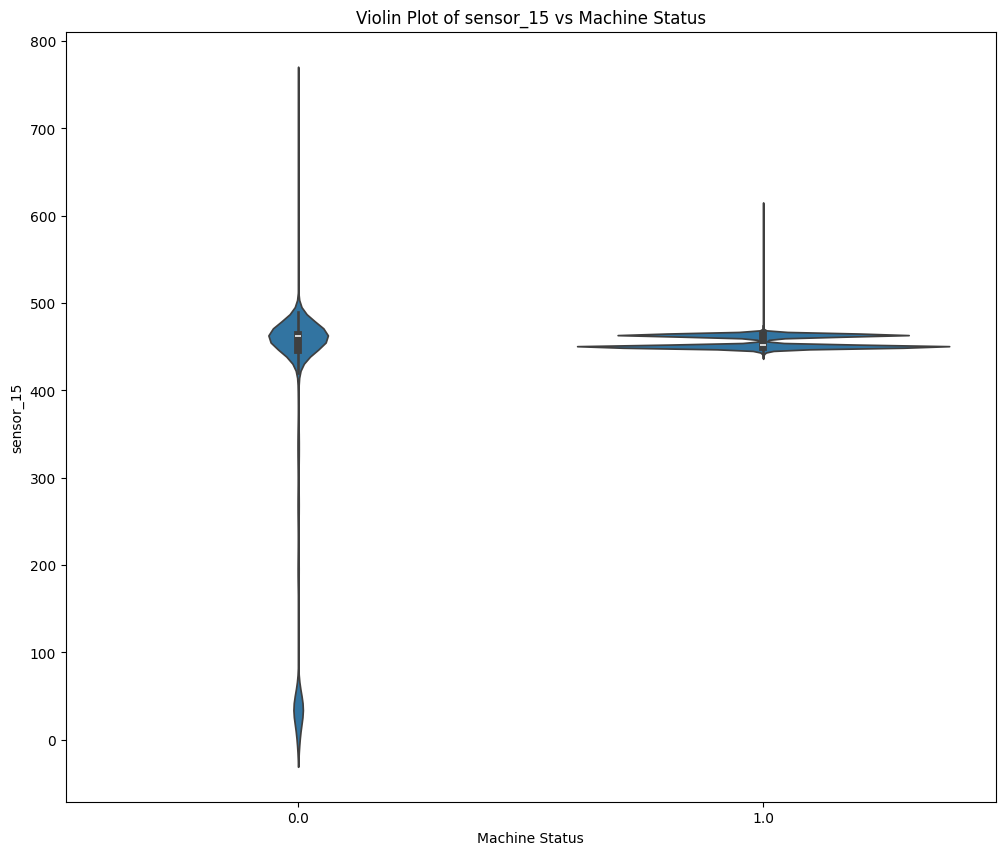

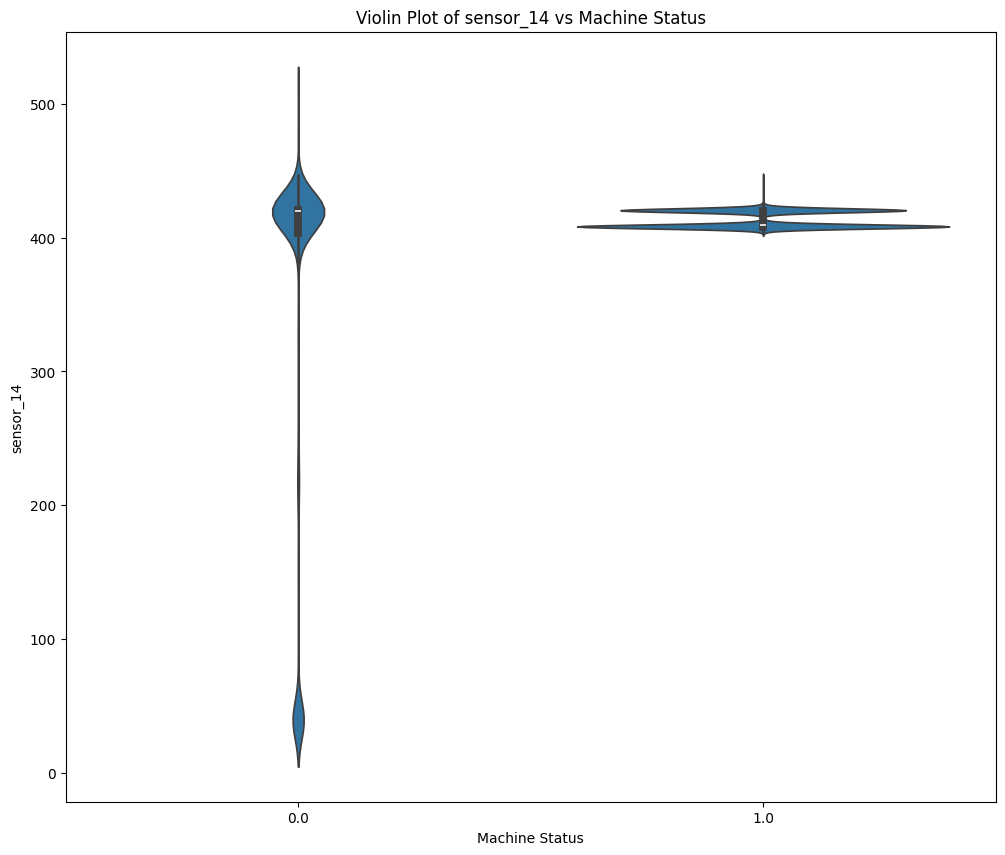

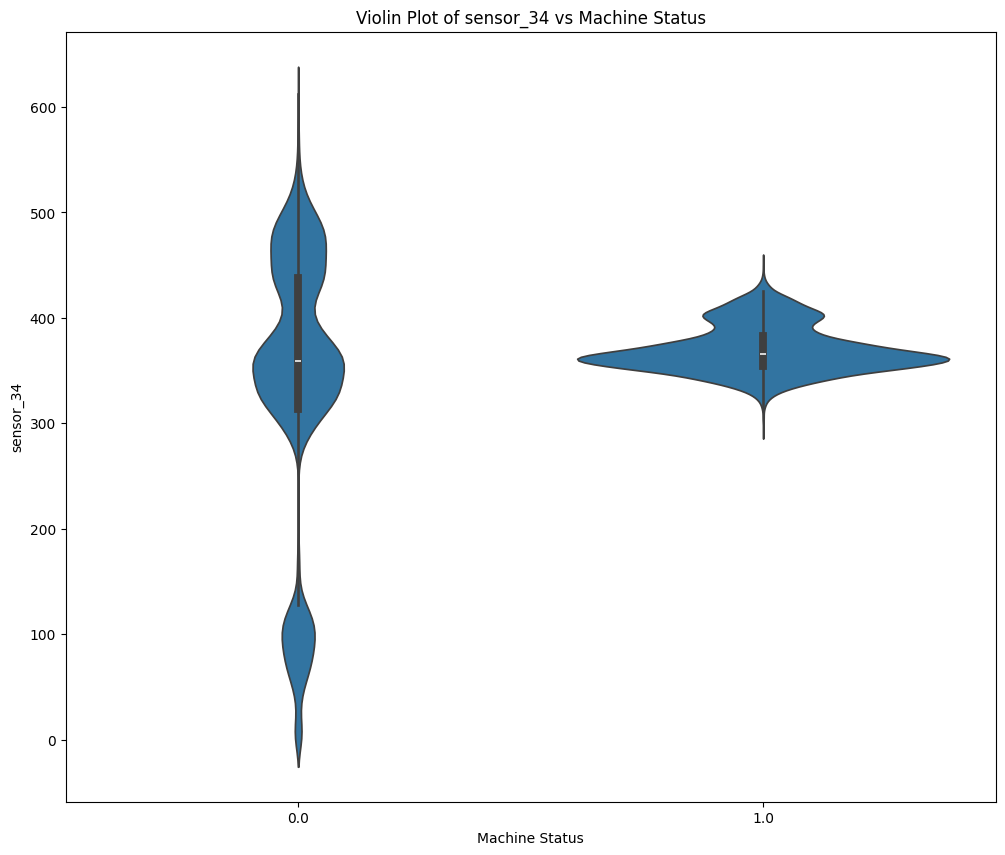

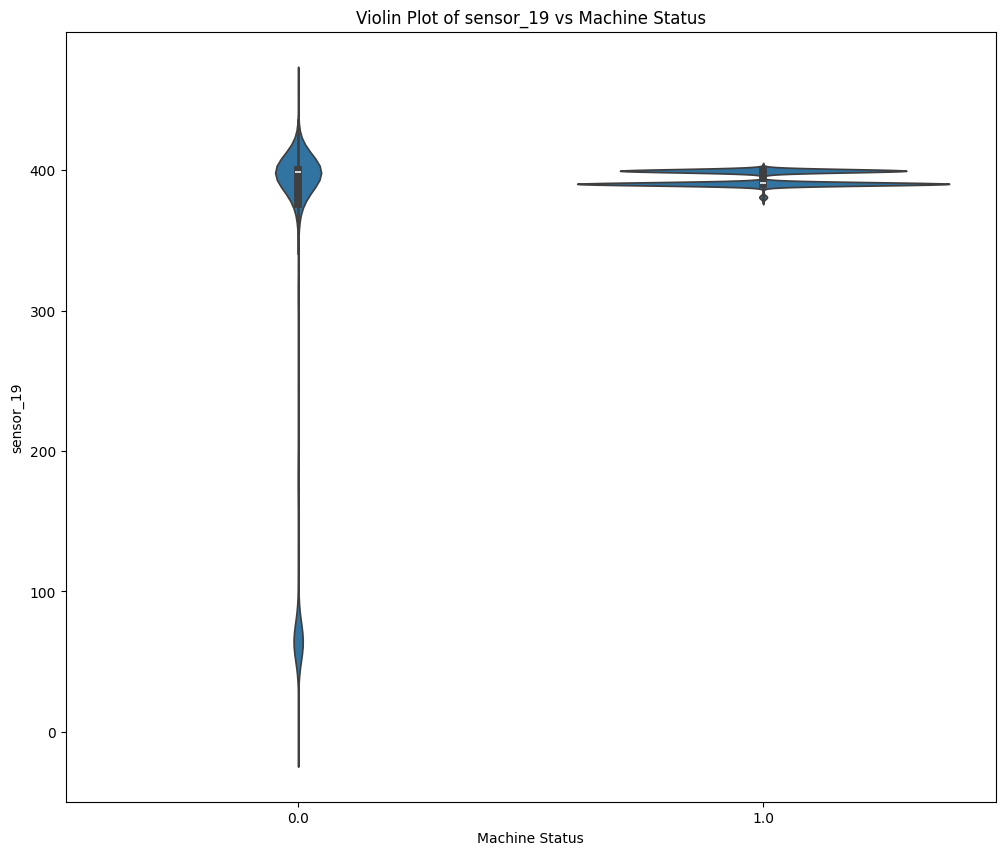

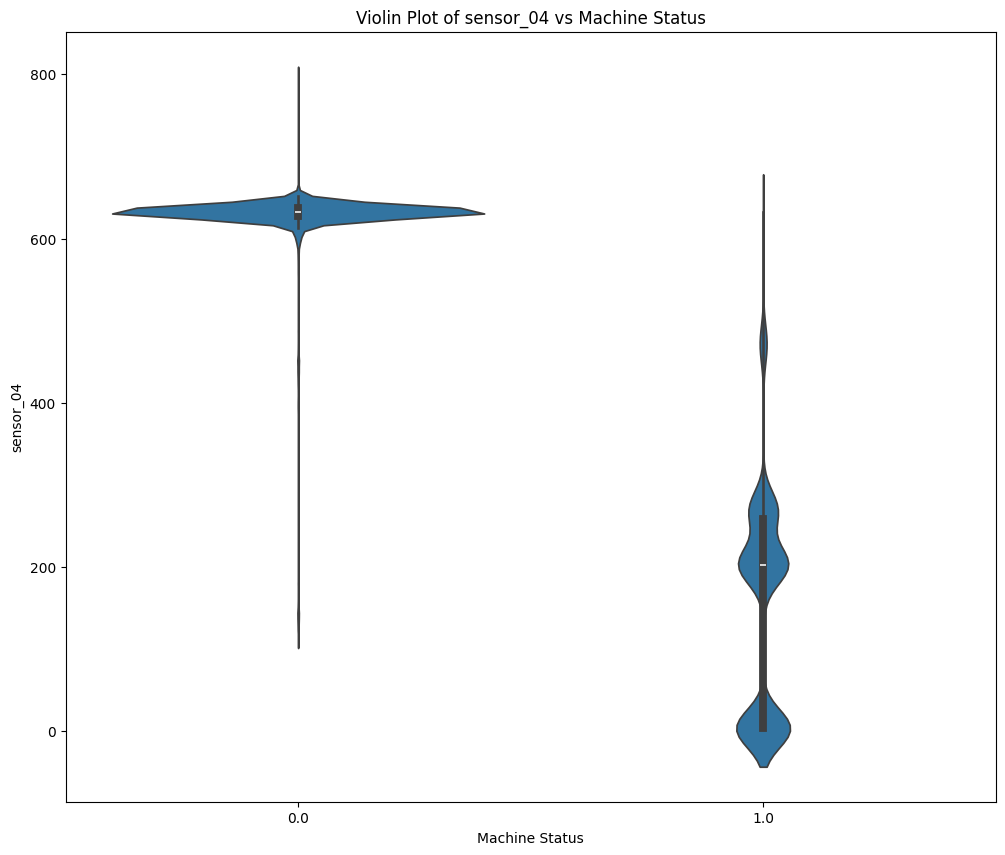

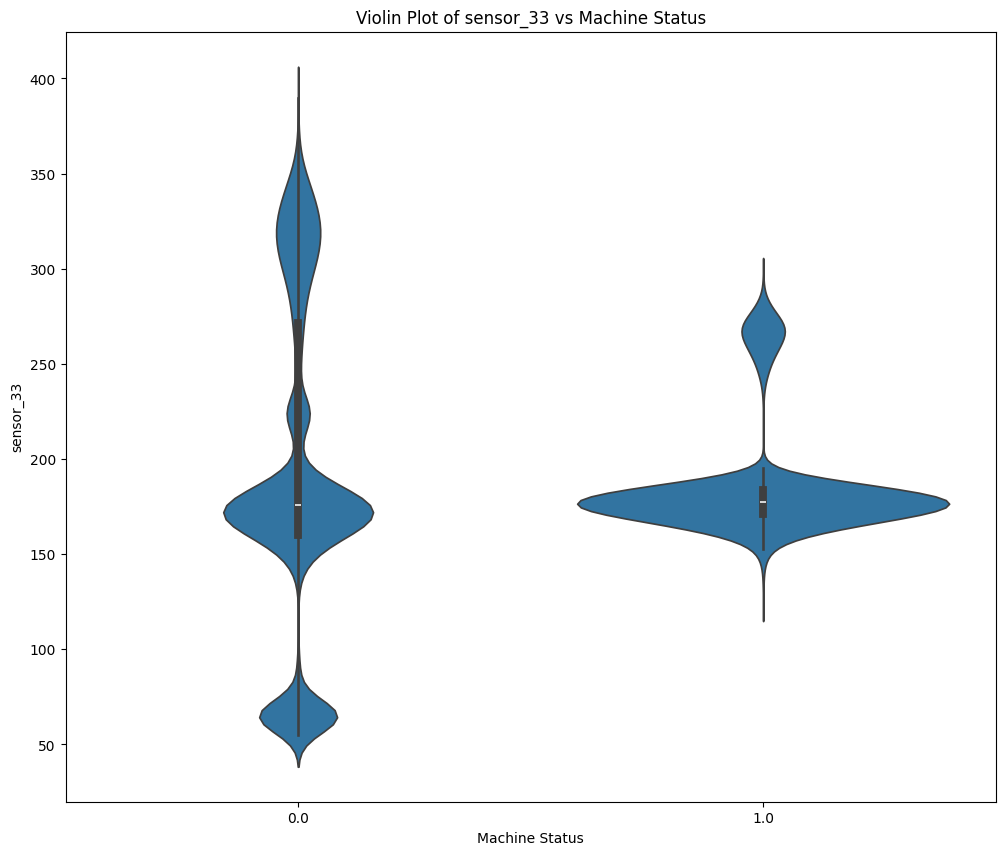

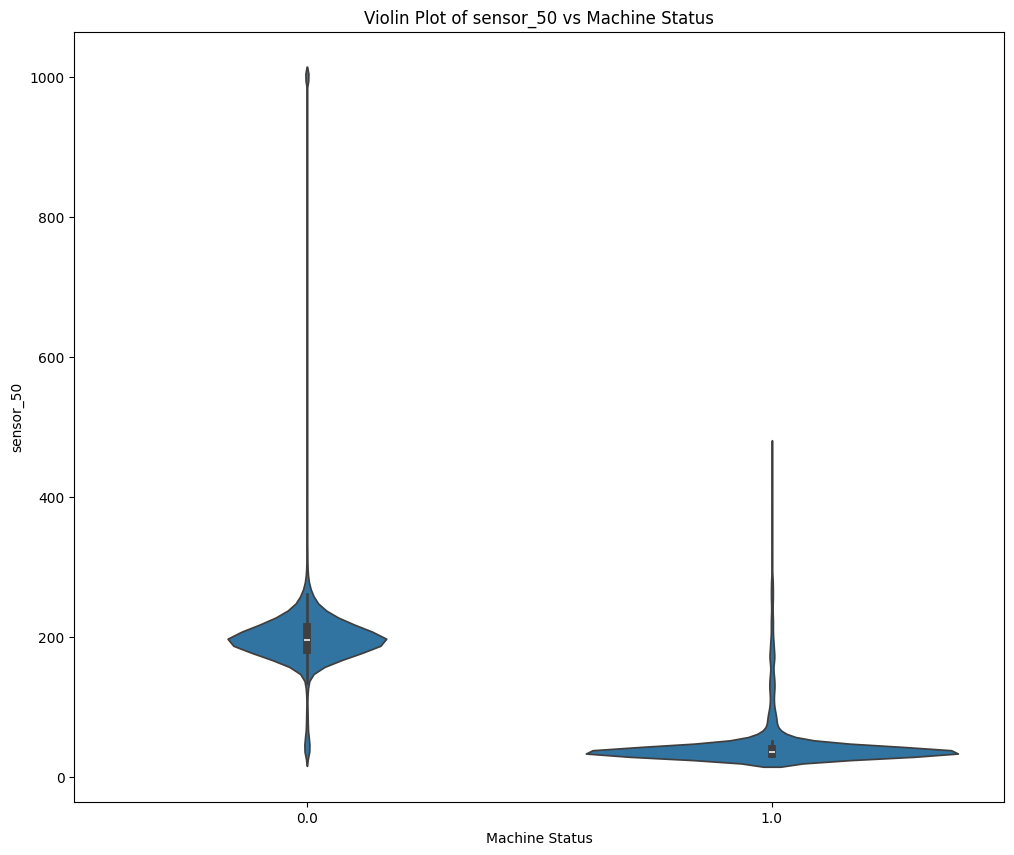

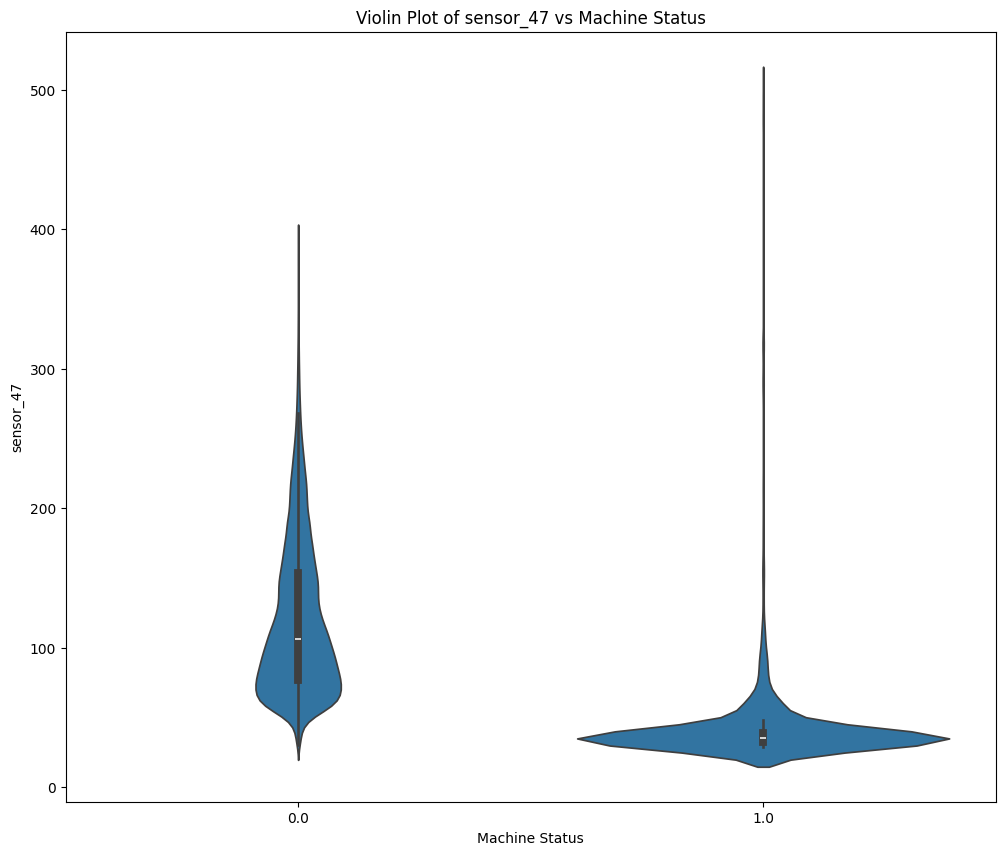

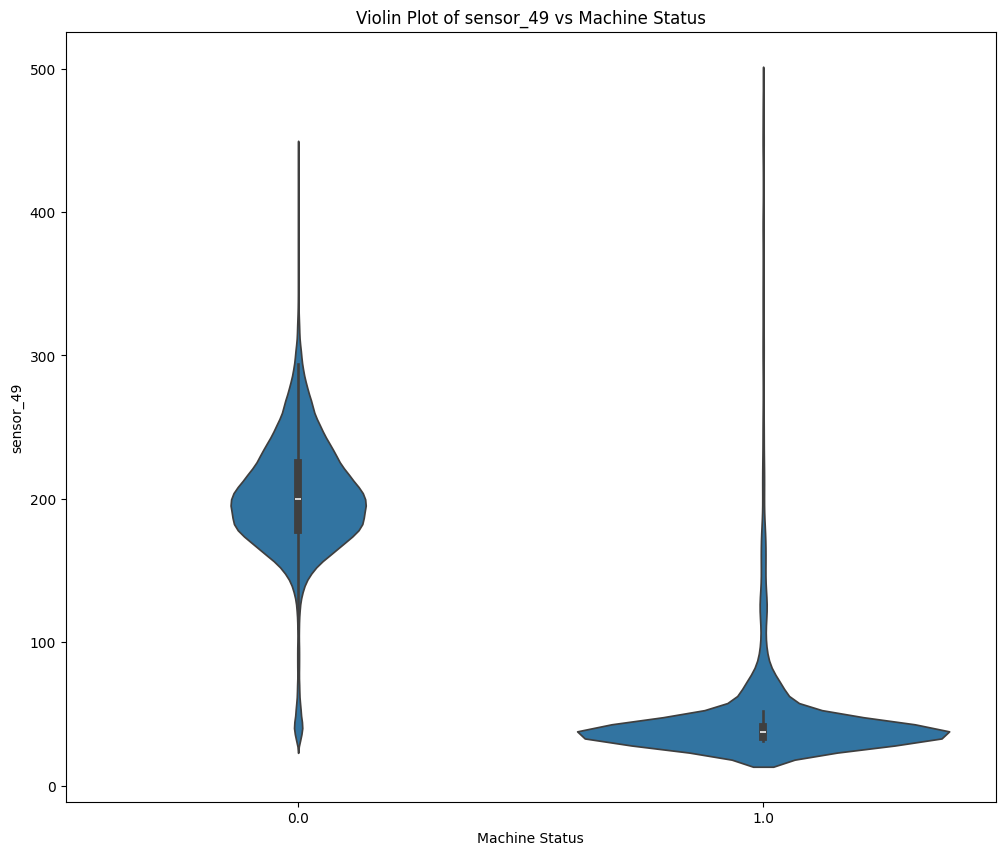

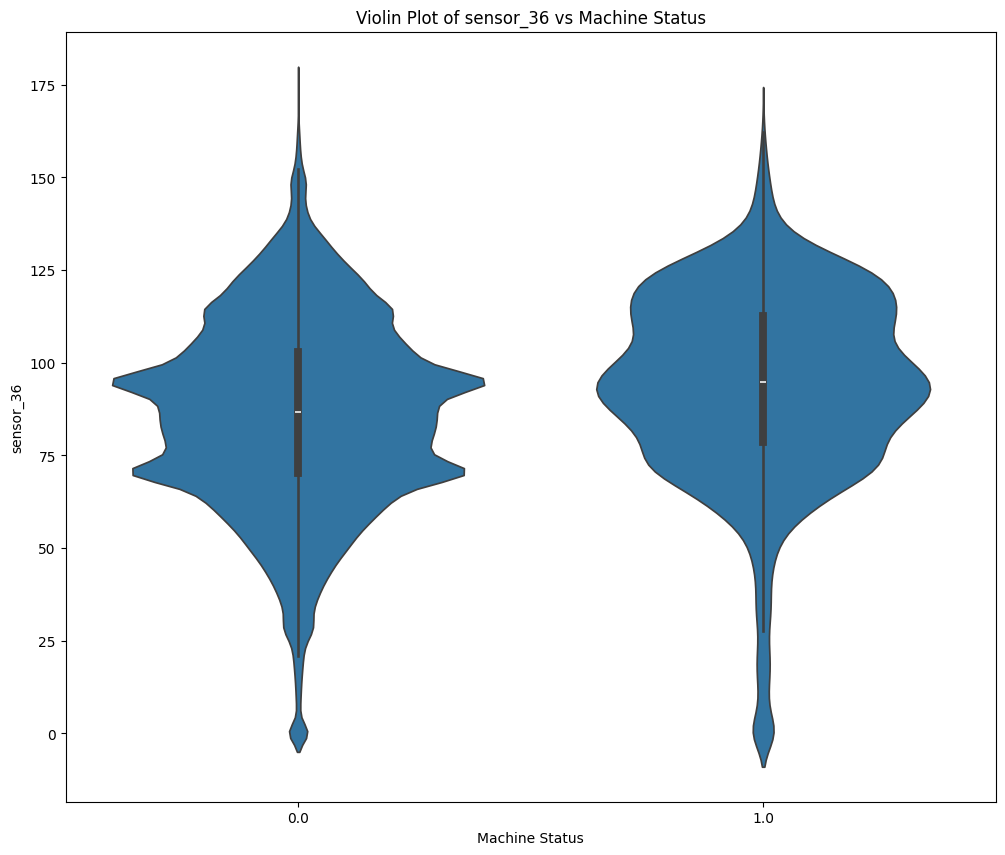

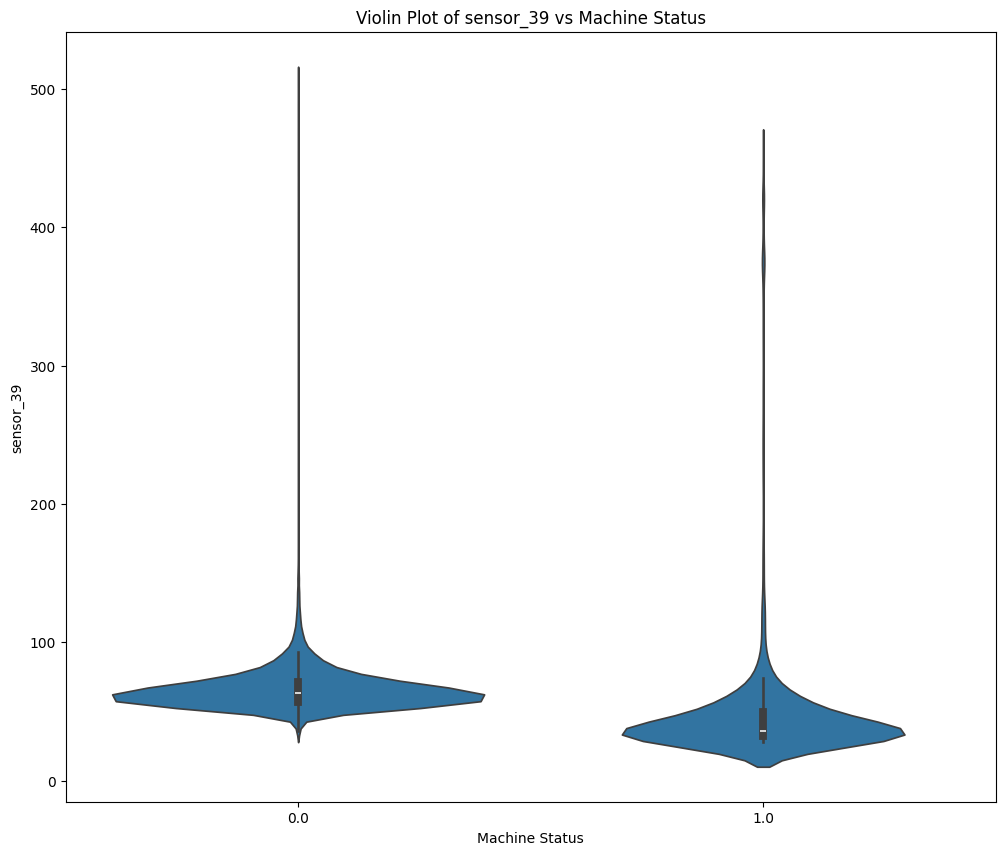

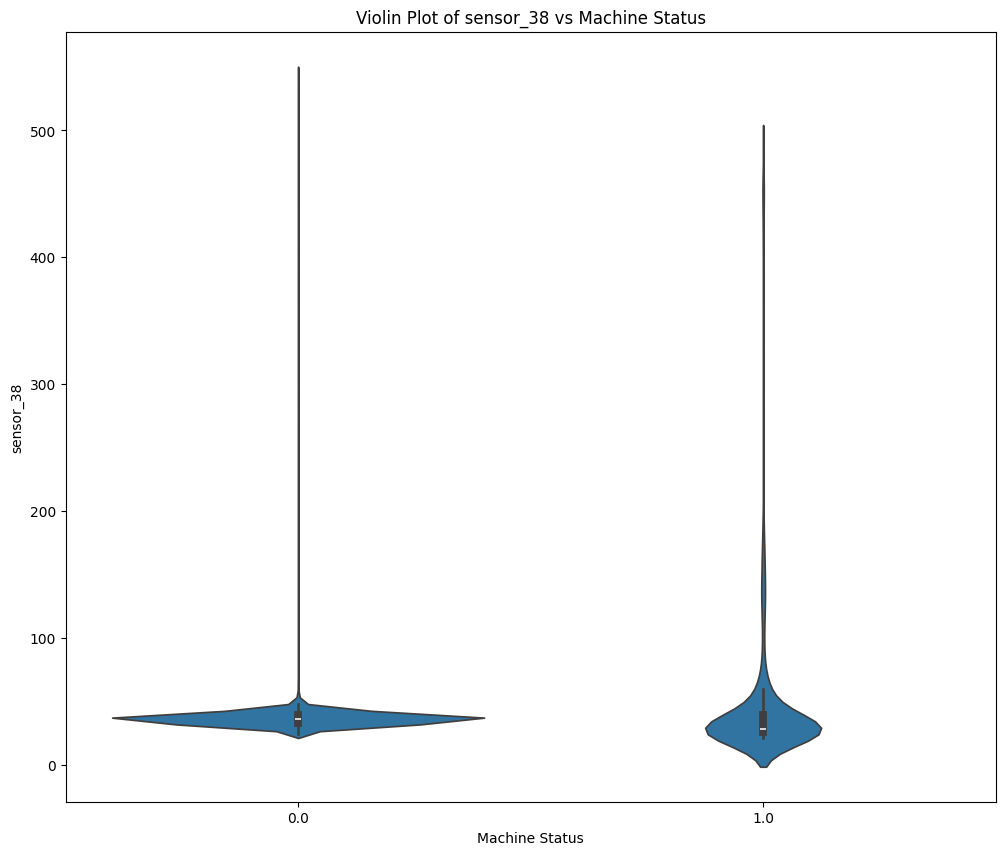

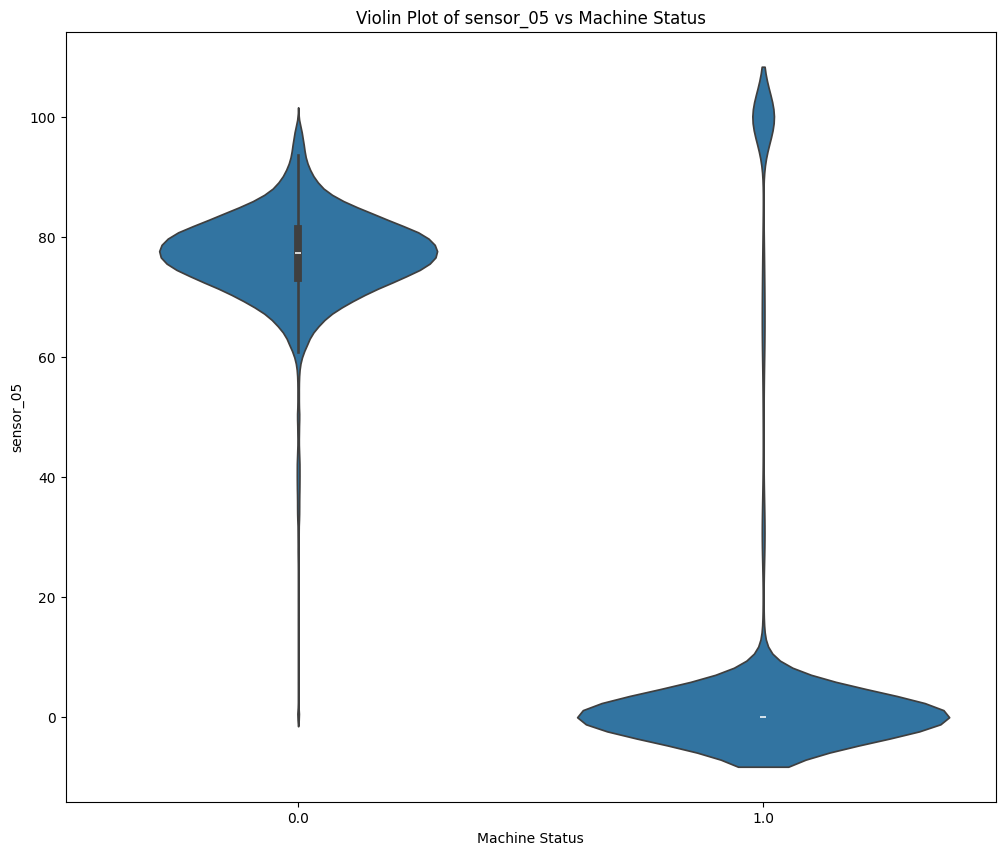

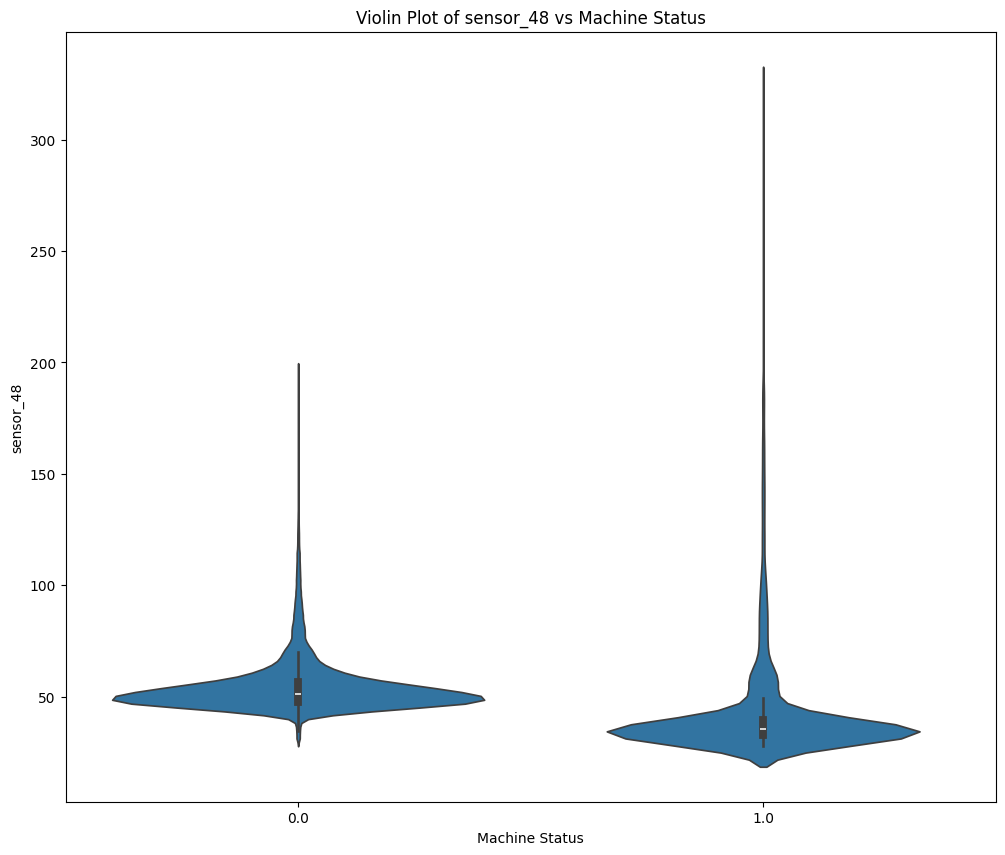

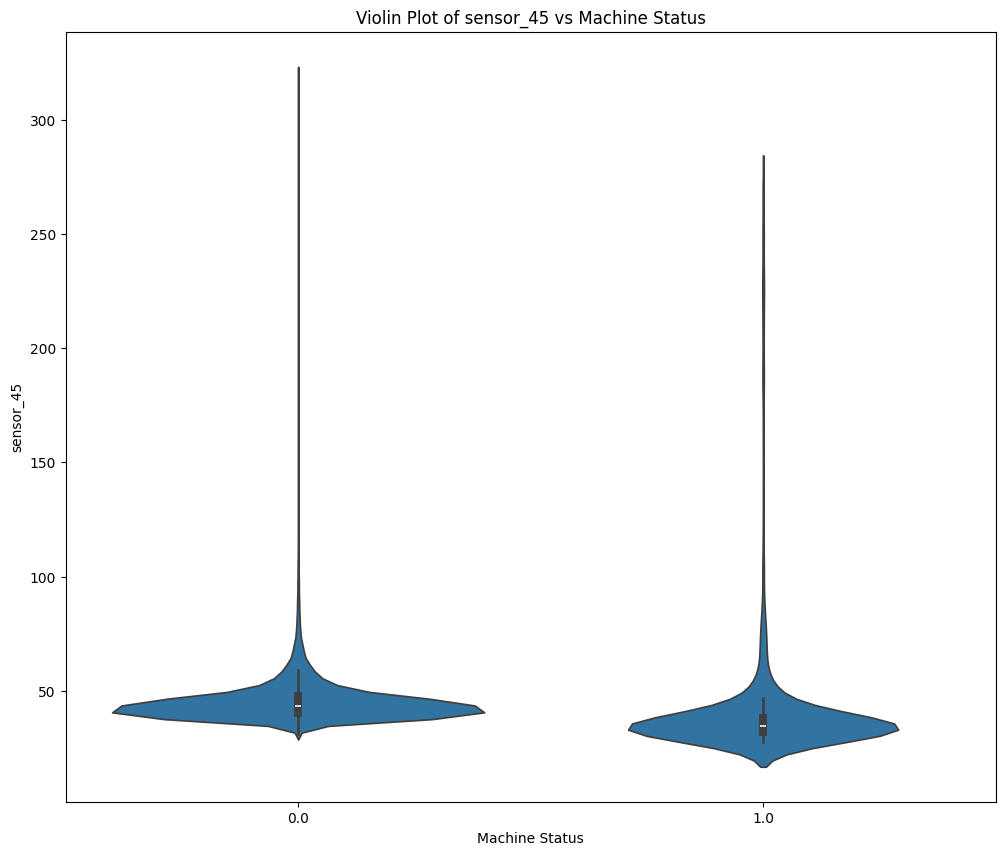

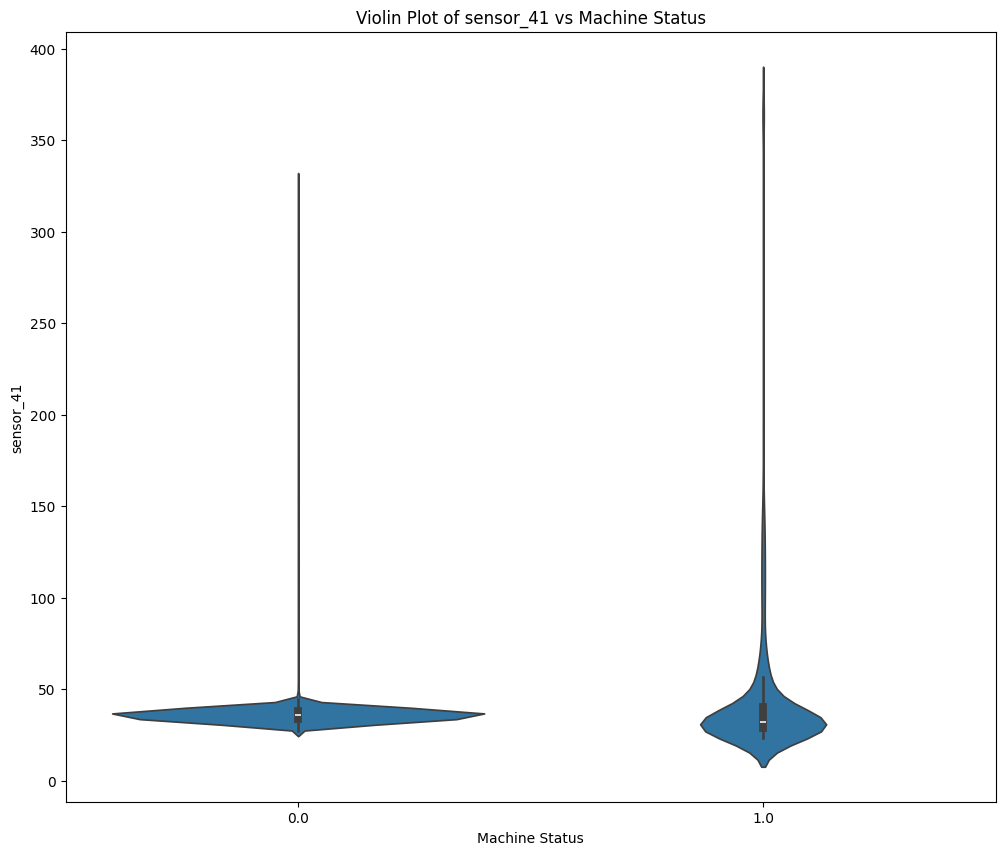

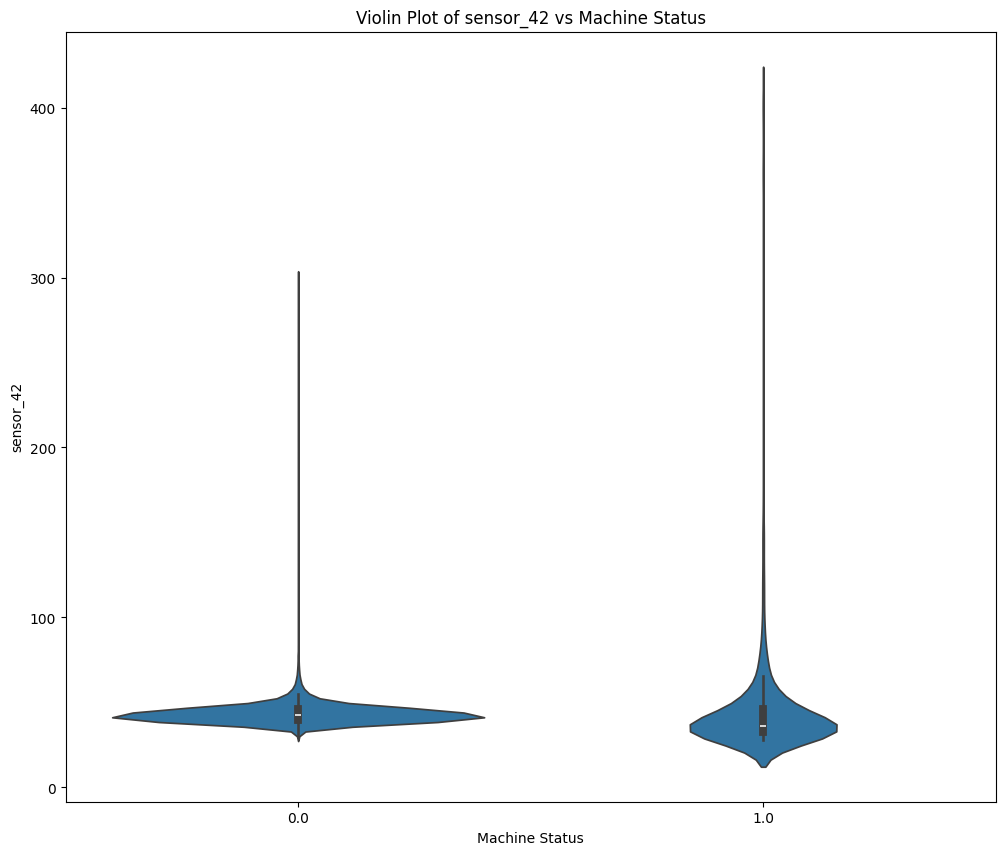

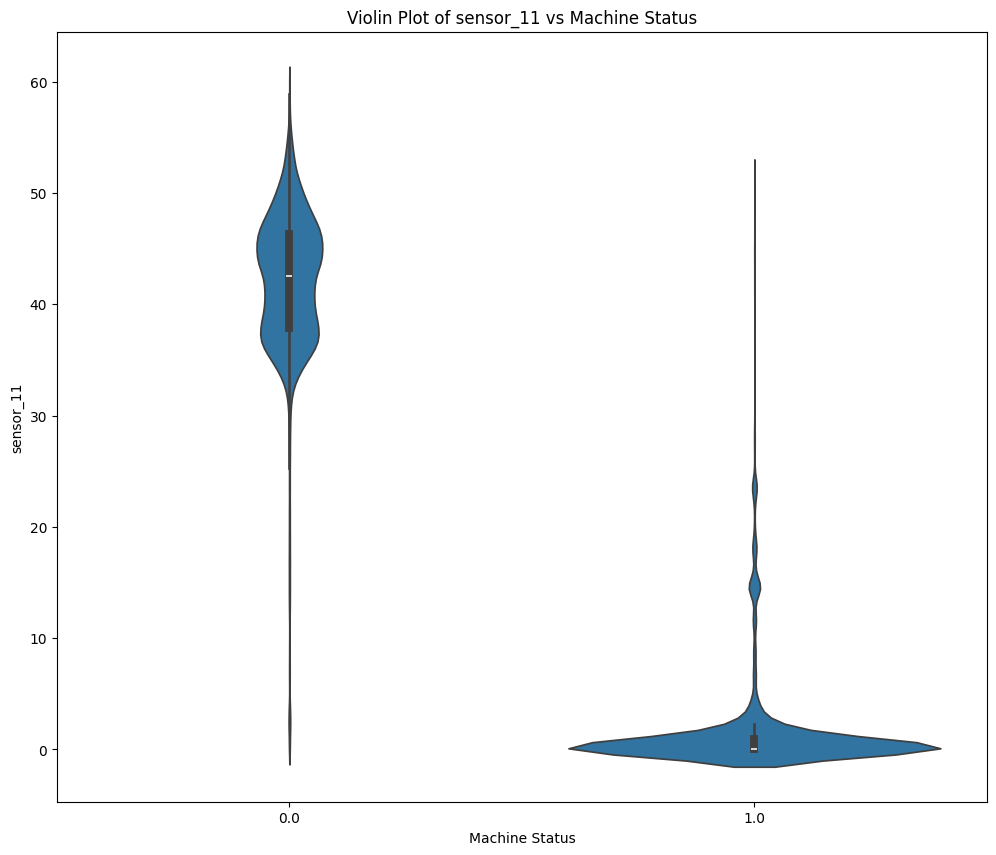

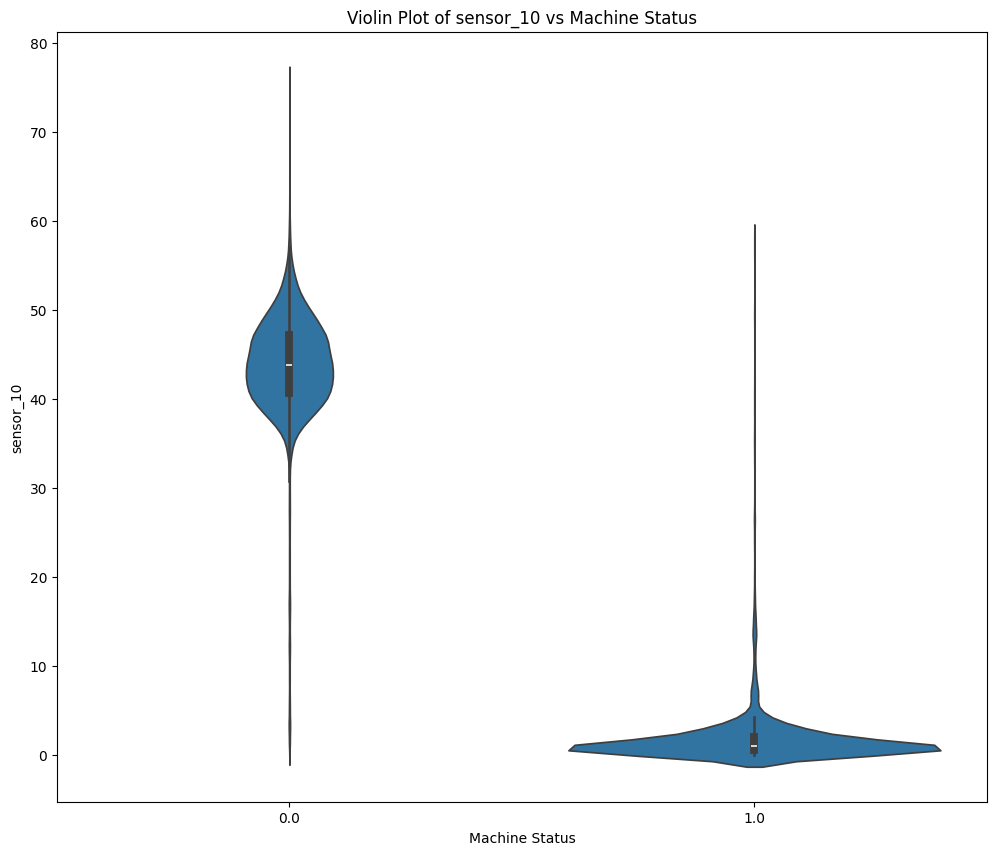

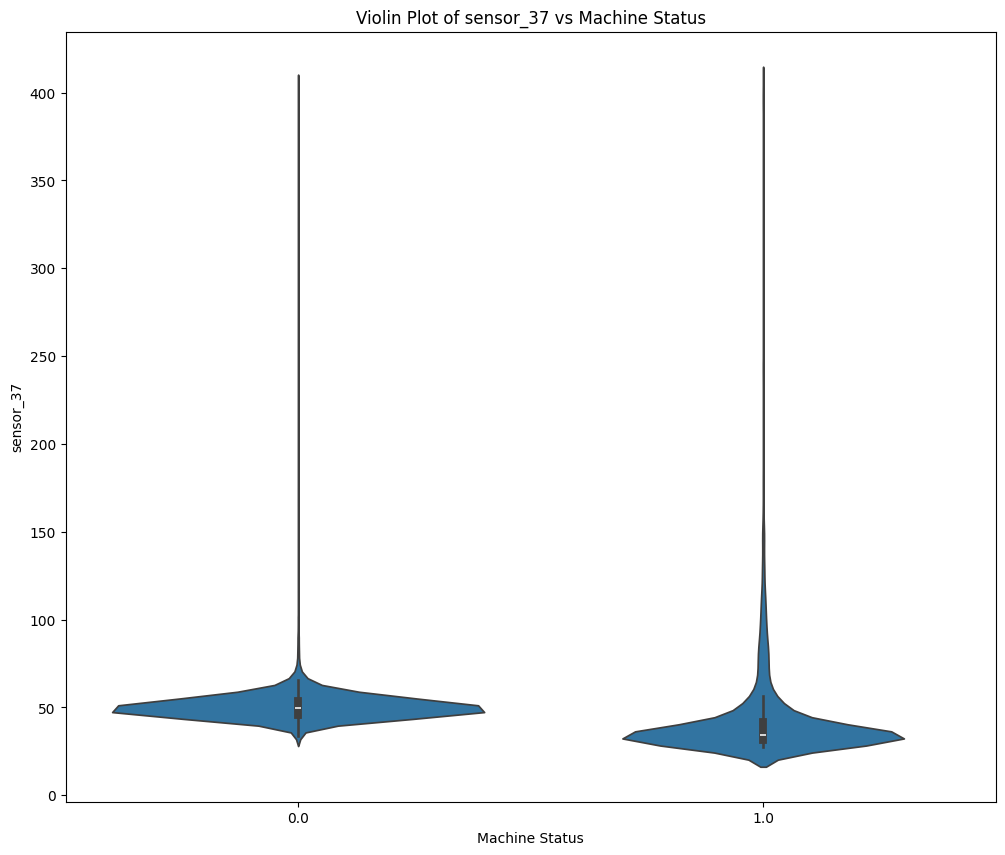

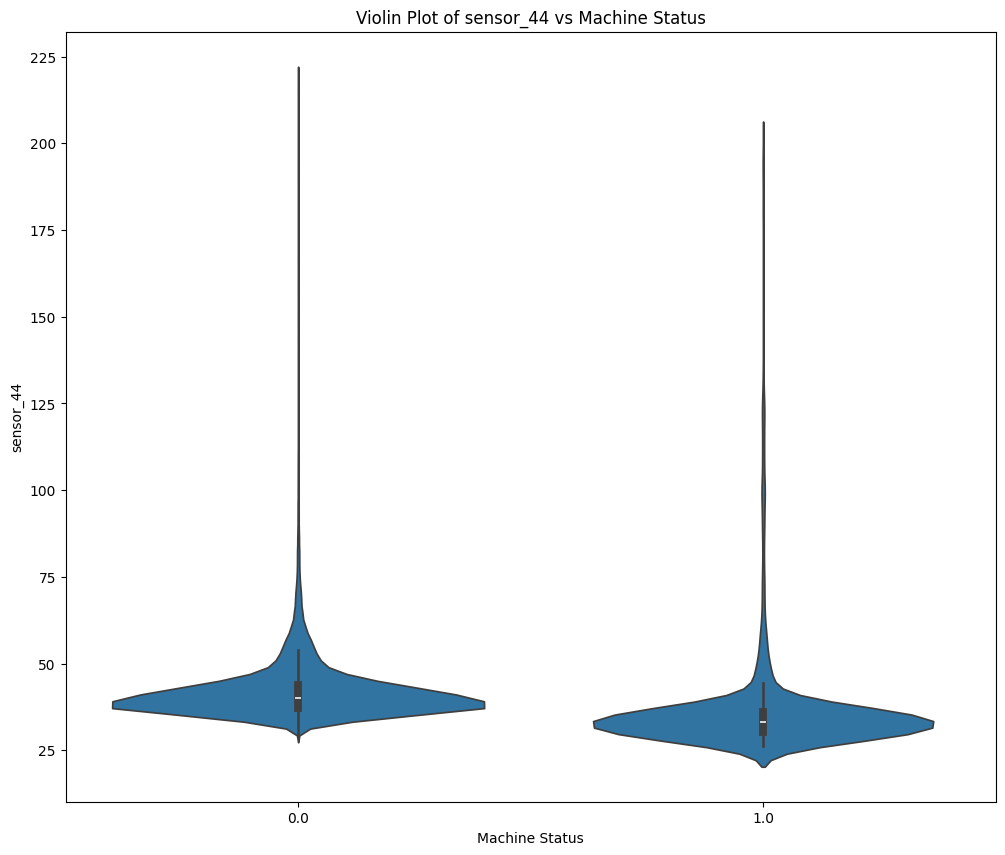

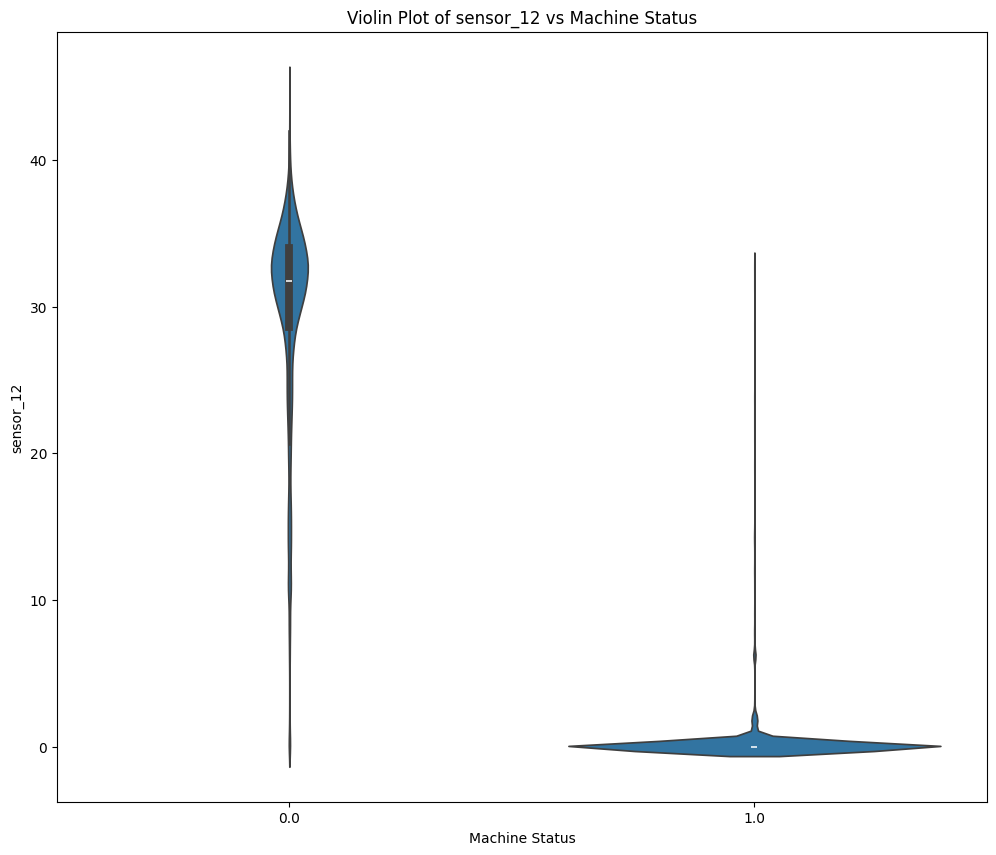

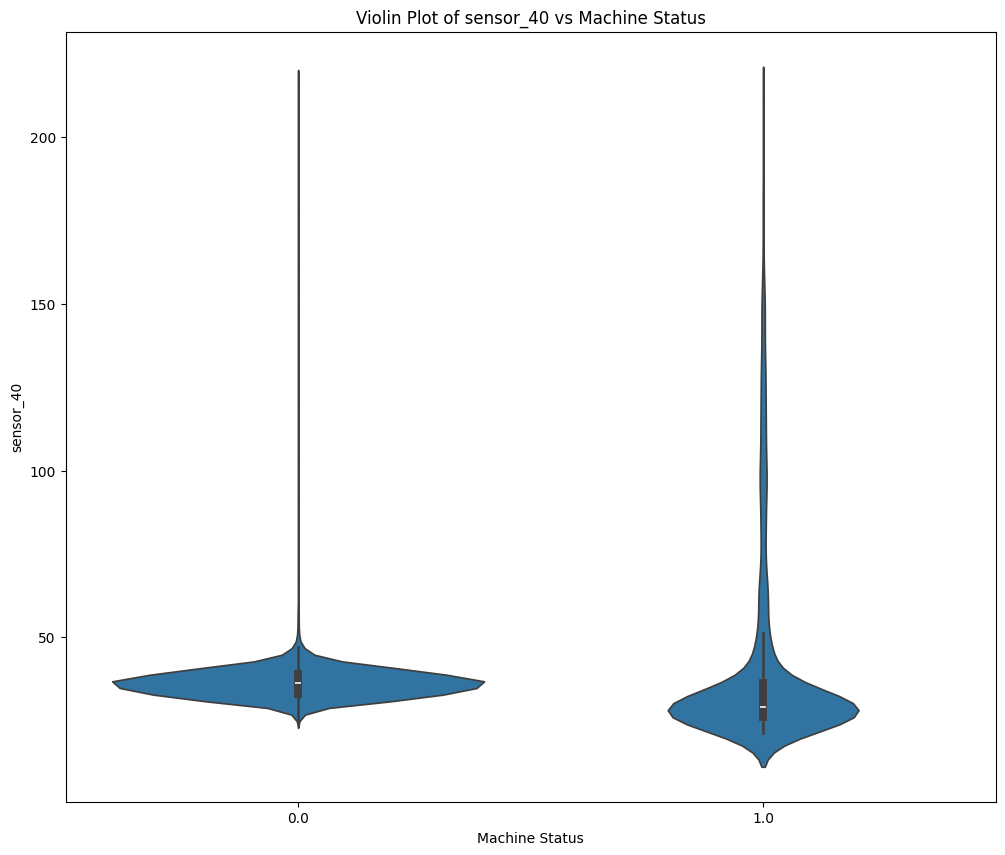

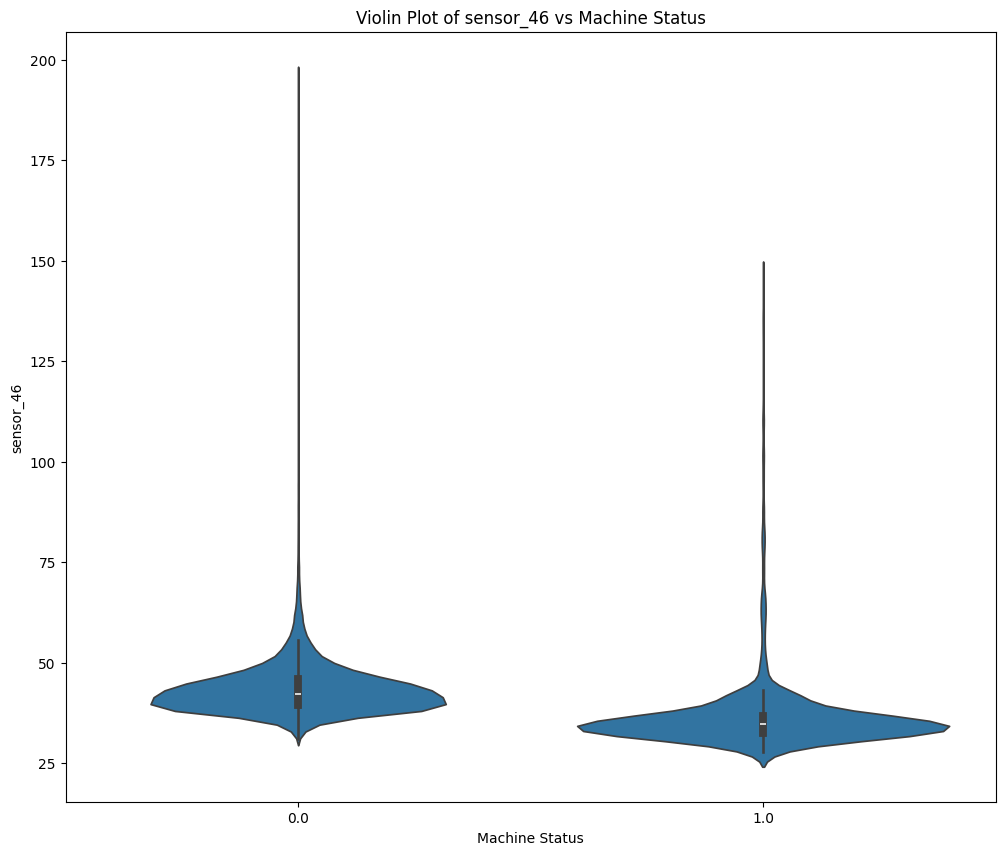

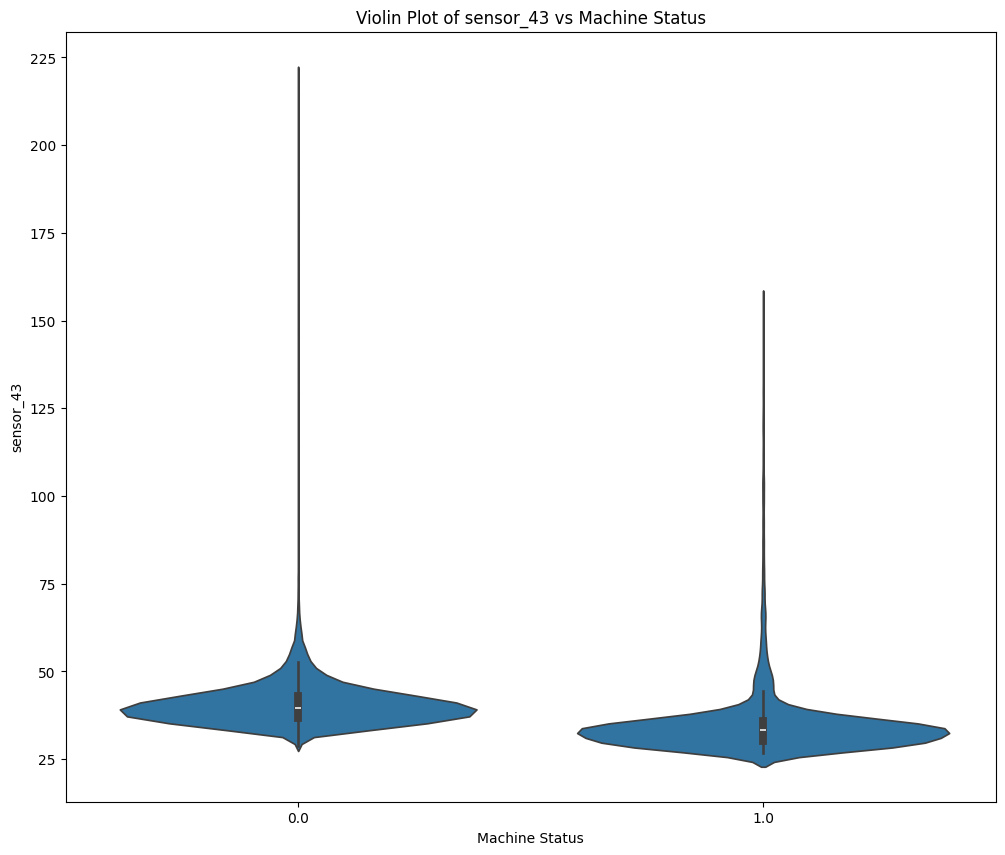

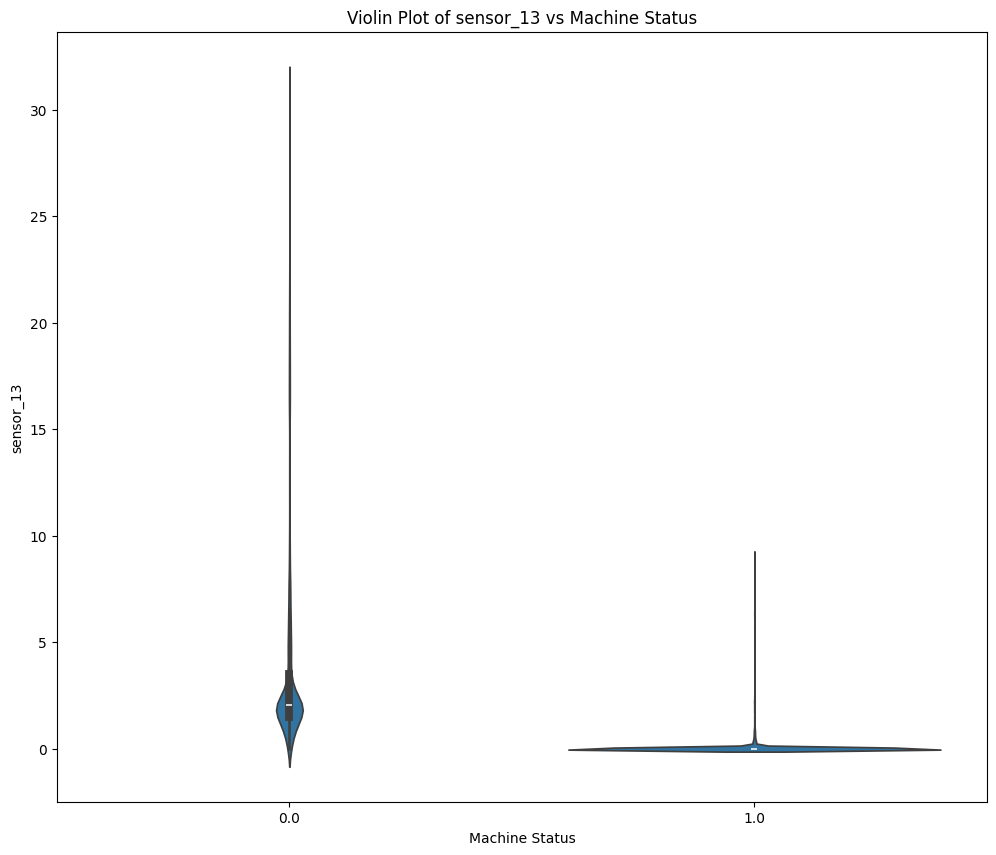

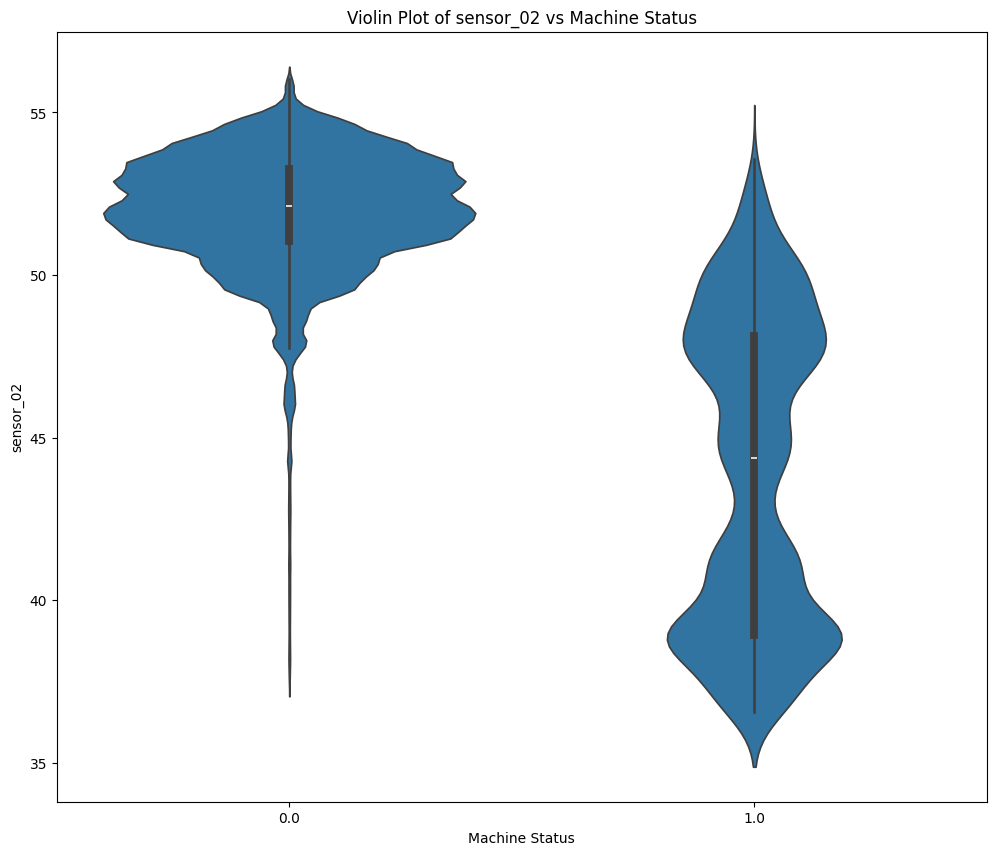

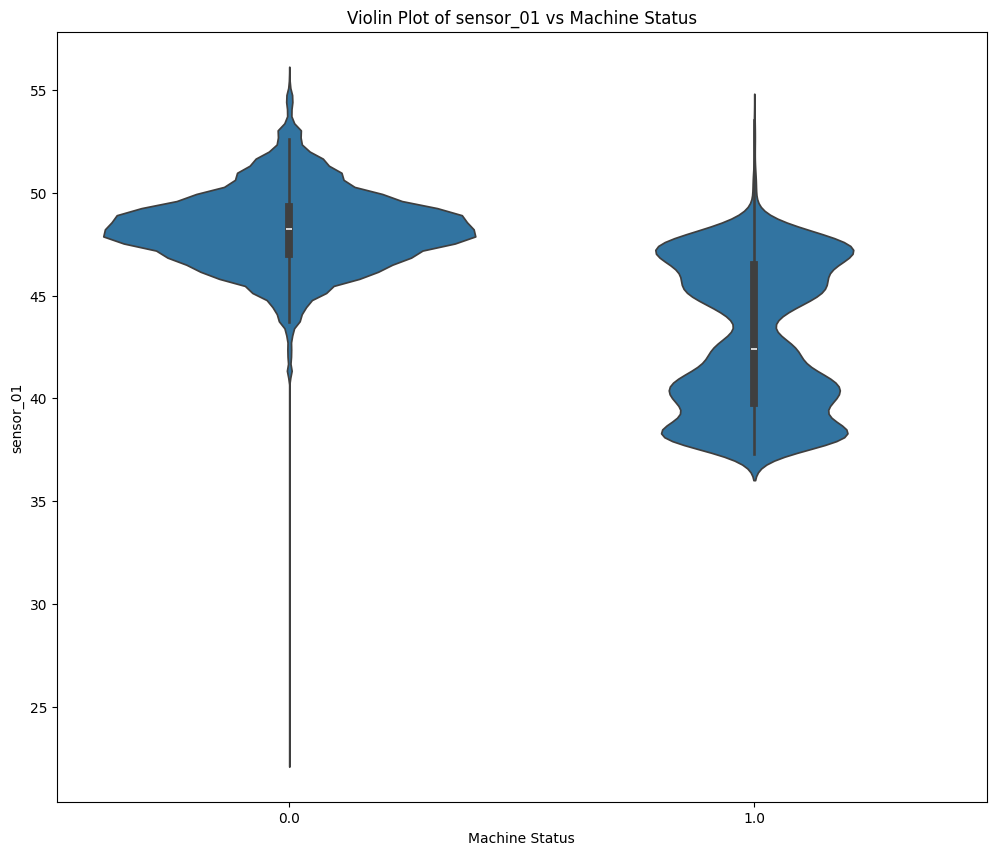

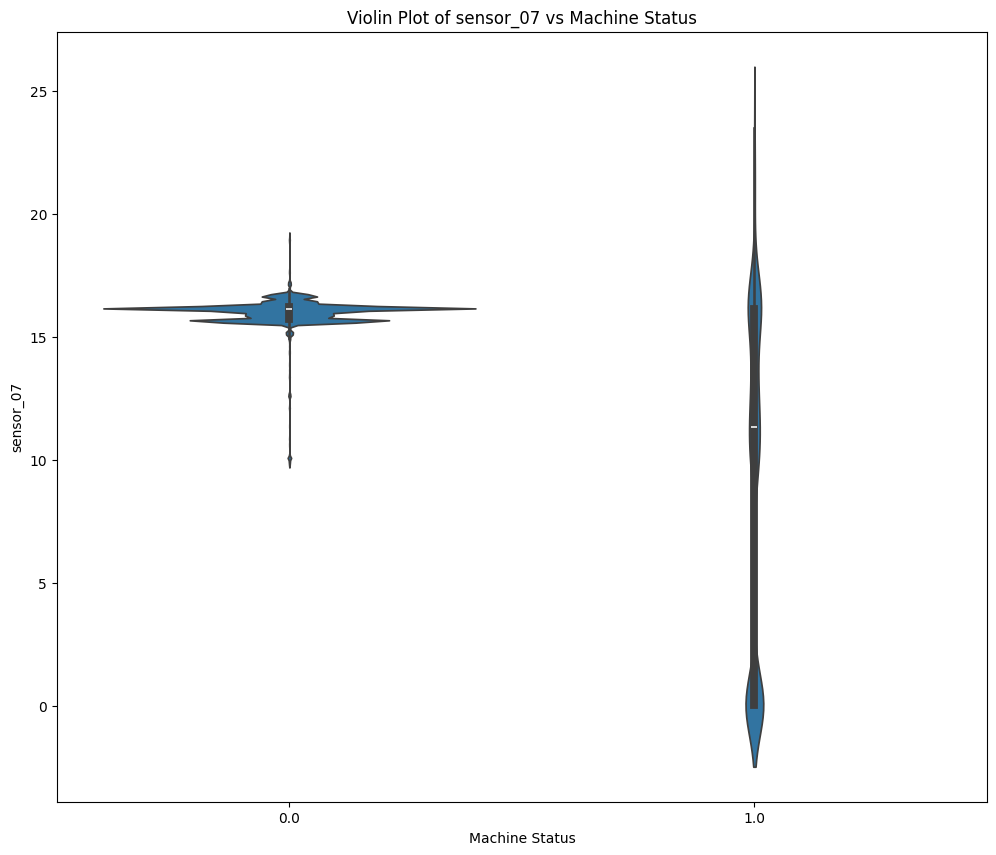

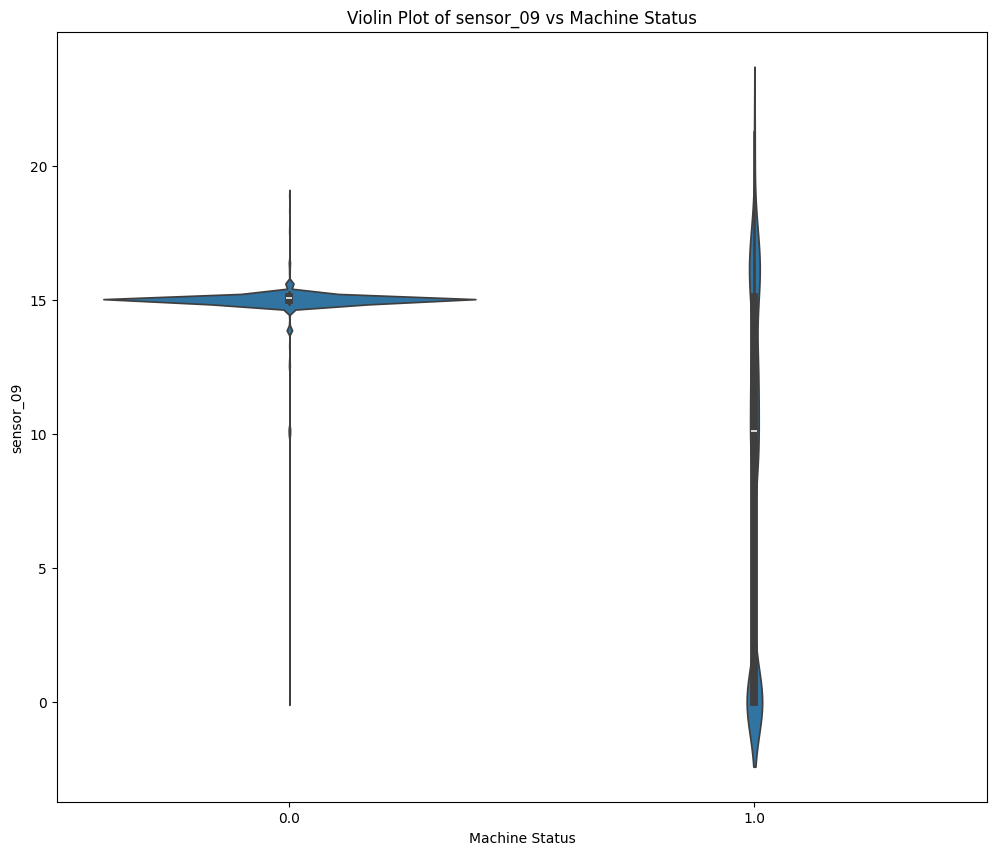

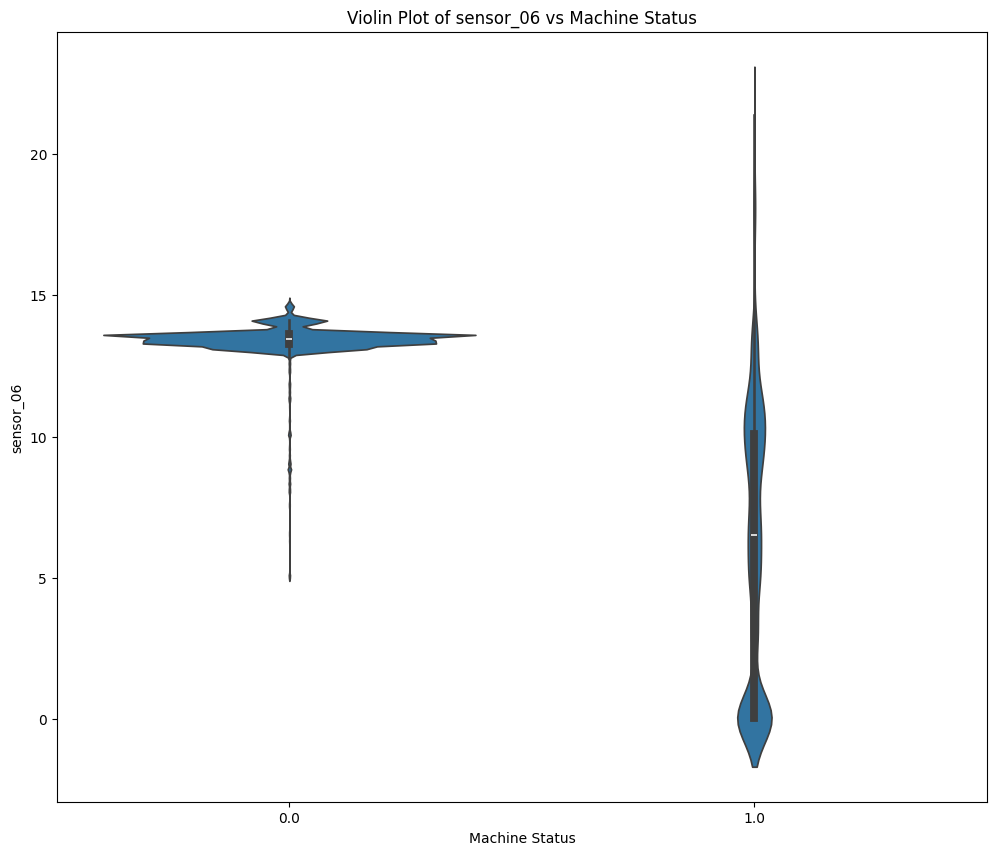

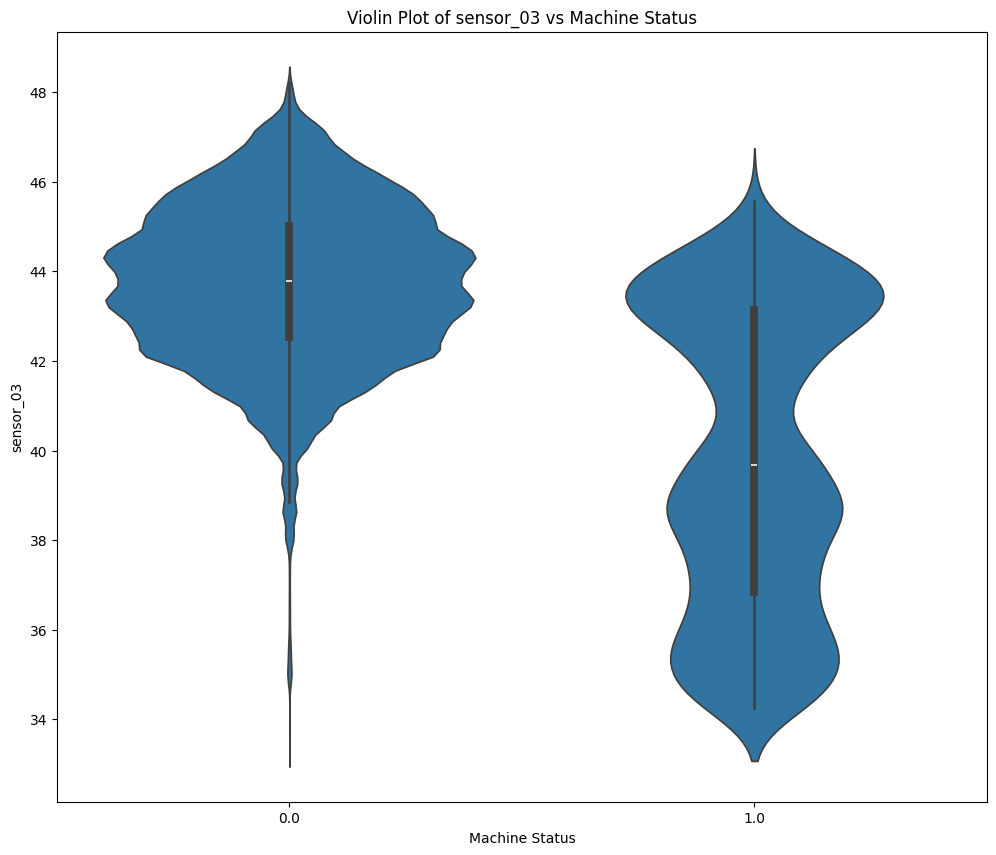

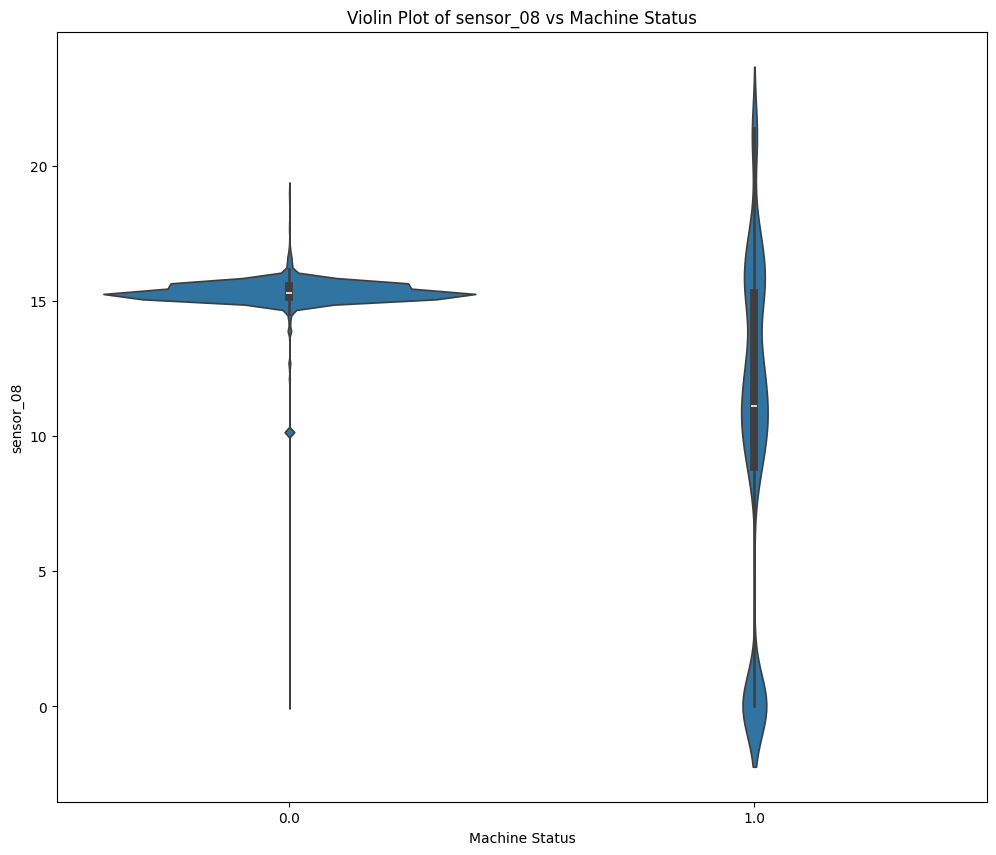

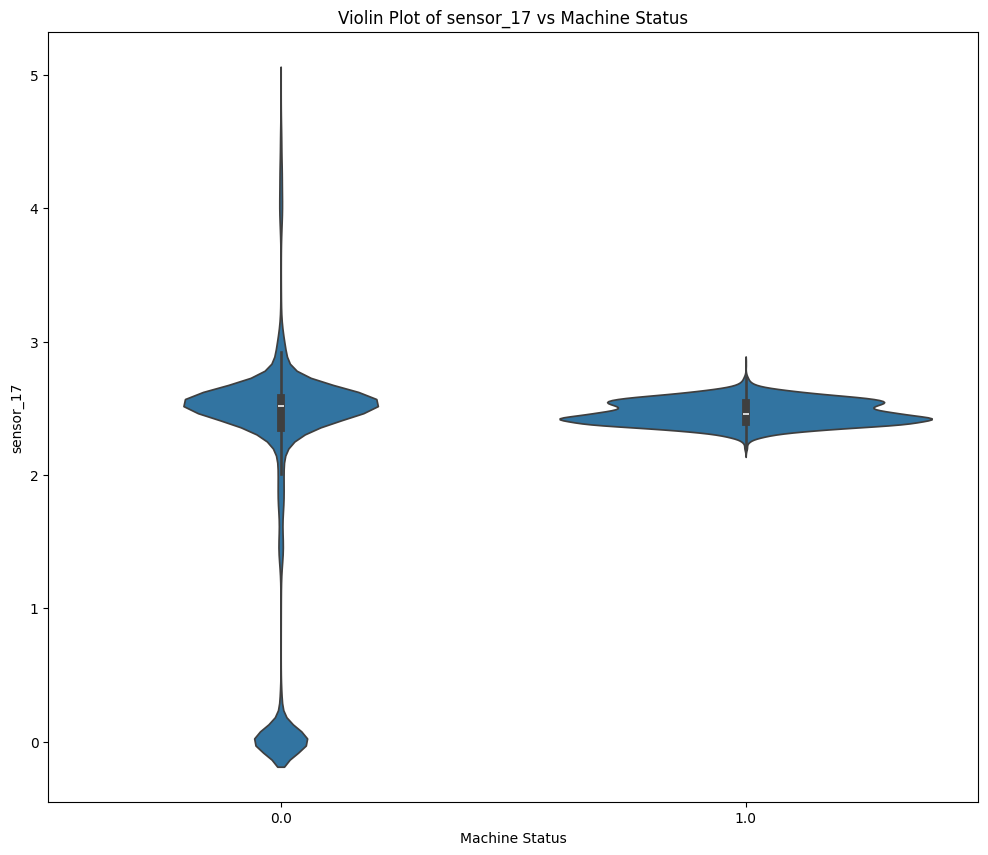

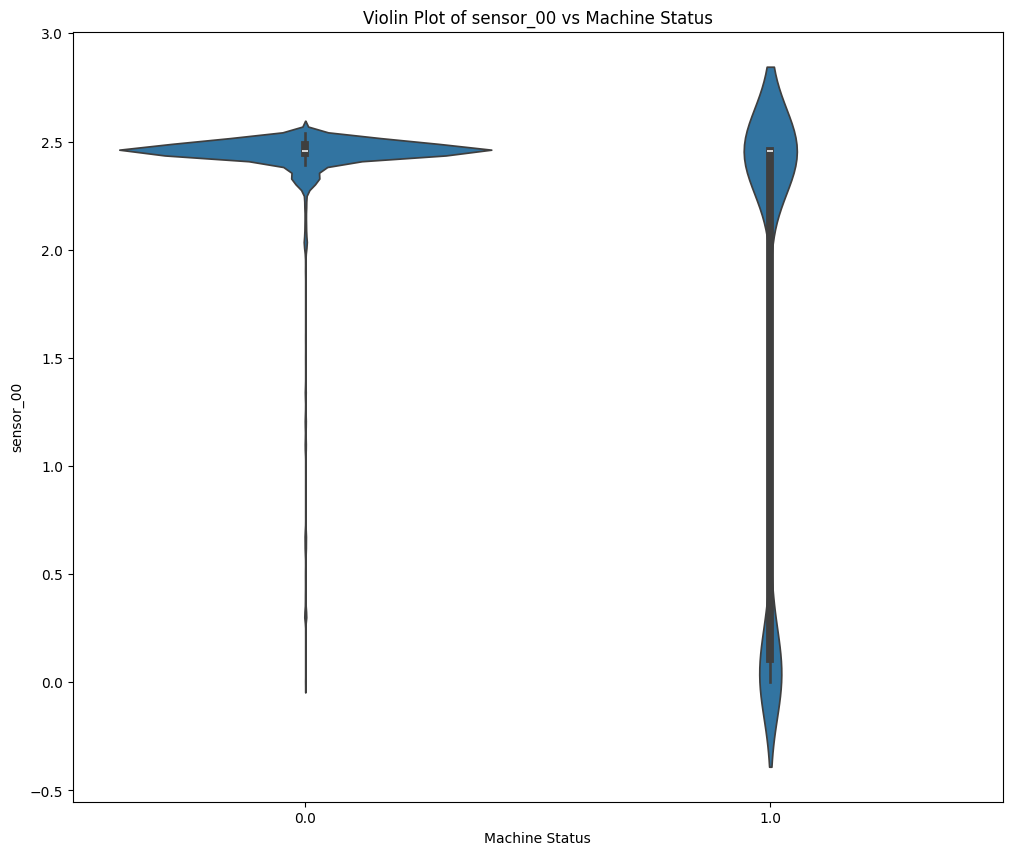

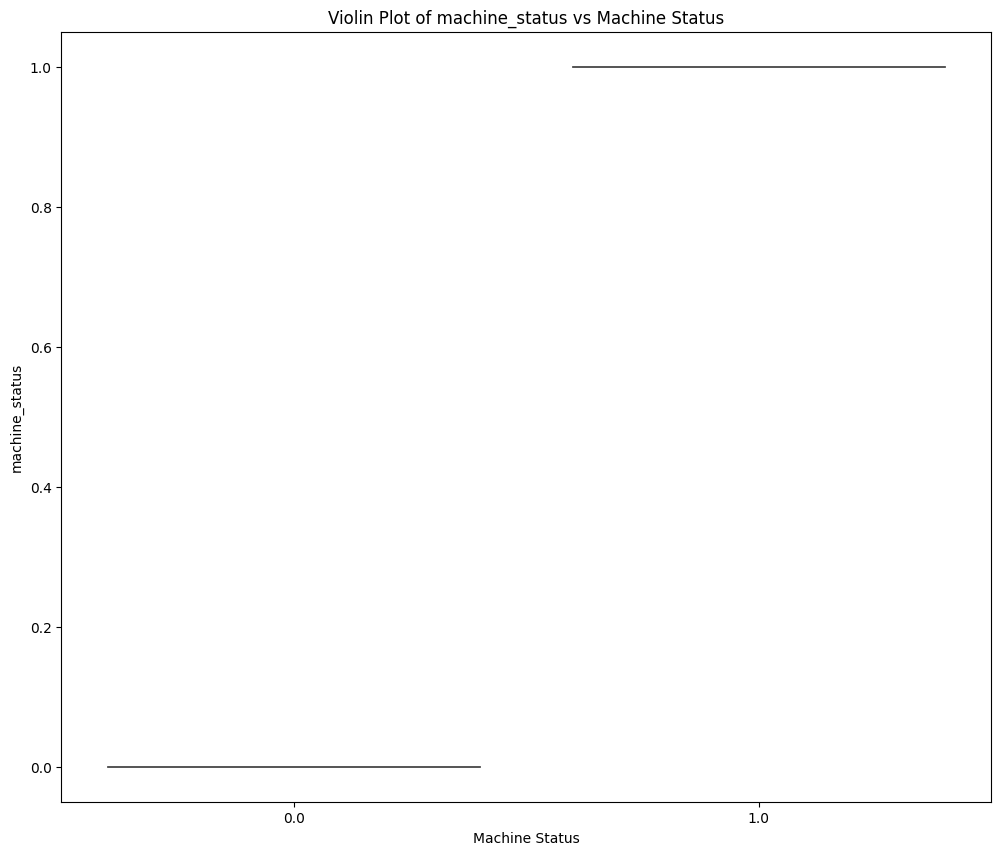

In [20]:
for sensor in selected_sensors:
    plt.figure(figsize=(12, 10))
    sns.violinplot(x=sensor_data['machine_status'], y=sensor_data[sensor])
    plt.title(f'Violin Plot of {sensor} vs Machine Status')
    plt.xlabel("Machine Status")
    plt.ylabel(sensor)
    plt.show()